## 1. Descripción del problema

En este proyecto se aborda la tarea de **clasificación supervisada de textos** para la detección de *ciberacoso (cyberbullying)* en redes sociales. El objetivo es construir modelos capaces de identificar automáticamente si un mensaje contiene contenido ofensivo, lenguaje abusivo o comportamientos asociados al ciberacoso.

El ciberacoso es un problema social creciente que afecta a personas de diferentes edades y contextos, y que puede generar consecuencias psicológicas graves. La automatización de su detección permite apoyar sistemas de moderación de contenido, proteger a comunidades vulnerables y reducir la propagación de violencia digital.

Para este trabajo se utiliza el dataset **Cyberbullying Detection Dataset**, disponible públicamente en Kaggle:

**Fuente del dataset:**  
Peesara, S. (2022). *Cyberbullying Detection Dataset*. Kaggle.  
Disponible en: https://www.kaggle.com/datasets/sandhyapeesara/cyberbullying-detection-dataset

Este conjunto de datos contiene diferentes tipos de textos extraídos de redes sociales y clasificados en varias categorías que representan tanto comportamientos de ciberacoso como mensajes neutros. Está compuesto principalmente por las siguientes columnas:

- **`tweet_text`**: texto del mensaje.
- **`cyberbullying_type`**: etiqueta asignada por anotadores humanos.  
  Las categorías incluyen:
  - *not_cyberbullying*  
  - *age*  
  - *religion*  
  - *ethnicity*  
  - *gender*  
  - *other_cyberbullying*

Cada una de estas categorías representa un tipo de mensaje abusivo basado en distintas formas de discriminación. Para efectos del análisis en este proyecto, esta variable se trabaja como la **etiqueta (target)** del problema de clasificación.

**Objetivo del trabajo:**  
El objetivo principal es entrenar, ajustar y comparar diferentes modelos de aprendizaje supervisado —incluyendo regresión multivariada, árbol de decisión, Random Forest, MLP y una red neuronal profunda (DNN)— con el fin de determinar cuál de ellos ofrece el mejor rendimiento para la detección automática de ciberacoso en los textos del dataset.

Para lograrlo, se realiza un proceso completo que incluye:

1. Inspección visual y estadística del dataset.  
2. Preprocesamiento de texto (limpieza, normalización, lematización, etc.).  
3. Representación vectorial mediante métodos como TF-IDF.  
4. Entrenamiento y ajuste de modelos con **GridSearchCV** y validación cruzada.  
5. Evaluación basada en métricas como accuracy, precisión, recall, F1-score y matrices de confusión.  
6. Análisis comparativo de resultados y discusión final.

Este estudio permite evaluar qué tan efectivos son los modelos tradicionales de machine learning y las redes neuronales para abordar el desafío real de detectar ciberacoso en lenguaje natural.

https://github.com/AnaKarina15/Aprendizaje-de-maquinas-supervisado.git

## 2. Inspección y Análisis Exploratorio de Datos  
### 2.1 Importación de Librerías  

#### Procesamiento y Limpieza de Texto  
- **re**: Manejo de expresiones regulares para limpieza de texto  
- **string**: Acceso a caracteres especiales y utilidades para manipulación de texto  
- **emoji**: Detección y manejo de emojis  
- **contractions**: Expansión de contracciones en texto  
- **Unidecode**: Normalización de caracteres Unicode  
- **SpellChecker (pyspellchecker)**: Corrección ortográfica basada en diccionarios  
- **SymSpell (symspellpy)**: Corrección ortográfica de alta velocidad  
- **nltk**: Tokenización, stopwords, stemming, POS tagging y recursos lingüísticos  
- **spacy**: Procesamiento de lenguaje natural (tokenización, POS, entidades)  

#### Análisis y Manipulación de Datos  
- **numpy**: Operaciones numéricas y manejo de arreglos  
- **pandas**: Manipulación y análisis de datos estructurados  
- **collections.Counter**: Conteo eficiente de elementos  

#### Visualización  
- **matplotlib.pyplot**: Gráficos estáticos y visualización general  
- **seaborn**: Visualización estadística  
- **wordcloud**: Generación de nubes de palabras  

#### Modelado y Aprendizaje Automático  
- **scikit-learn**:  
  - División de datos (*train_test_split*)  
  - Construcción de pipelines  
  - Vectorización TF-IDF  
  - Validación cruzada (*StratifiedKFold*)  
  - Búsqueda de hiperparámetros (*RandomizedSearchCV*, *GridSearchCV*)  
  - Clasificación con *DecisionTreeClassifier*  
  - Métricas como *confusion_matrix*  

- **scikeras / tensorflow**: Integración de modelos de deep learning dentro de scikit-learn  

#### Utilidades del Sistema  
- **requests**: Descarga de recursos externos  
- **TemporaryDirectory**: Manejo temporal de archivos  
- **time**: Medición de tiempos de ejecución  

In [1]:
!pip install emoji
!pip install gdown
!pip install contractions
!pip install pyspellchecker
!pip install symspellpy
!pip install nltk
!pip install spacy
!pip install Unidecode
!pip install seaborn
!pip install wordcloud
!pip install scikit-learn
!pip install scikeras tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable

   ------------- -------------------------- 1/3 [filelock]
   -------------------------- ------------- 2/3 [gdown]
   ---------------------------------------- 3/3 [gdown]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
import string
from collections import Counter
import emoji
import matplotlib.pyplot as plt
import contractions
from spellchecker import SpellChecker
from nltk import pos_tag
from symspellpy import SymSpell, Verbosity
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import requests
from tempfile import TemporaryDirectory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
import time
from sklearn.metrics import confusion_matrix

### 2.2 Generacion del dataset en el archivo
Para obtener el archivo de datos almacenado en Google Drive se utiliza **gdown**, una herramienta diseñada para descargar archivos directamente mediante su ID público.



In [3]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1dkVjE4EPY5rdMHV_K3PApsHNkDPpjguG"
output = "Cyber_Bully_Data.json"
gdown.download(url, output, quiet=False)

df = pd.read_json(output, lines=True)
print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1dkVjE4EPY5rdMHV_K3PApsHNkDPpjguG
To: c:\Users\Valentina\Downloads\Cyber_Bully_Data.json
100%|██████████| 17.6M/17.6M [00:01<00:00, 9.18MB/s]


                                                text              label
0  @ZubearSays Any real nigga isn't letting this ...     ethnicity/race
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  You saudias are not friends of Muslim idiots c...           religion
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...           religion


### 2.3 Visualización inicial de los datos



In [4]:
df.head(20)

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
5,@areyalldizzy @soobroll wait its so bad………. th...,ethnicity/race
6,A voting machine error in New Jersey flipped t...,not_cyberbullying
7,"@Leeo2680 @KeaweWong Now in President Jokowi, ...",religion
8,@NaTuRaLbeautyME @Phil_Lewis_ Agreed @NaTuRaLb...,ethnicity/race
9,"Linked in an email, 'Sarah, you're on a roll w...",not_cyberbullying


Se inspeccionaron las primeras filas del dataset mediante `df.head()`, lo que permitió confirmar que la estructura del conjunto de datos es consistente con la documentación del repositorio. El dataset contiene dos columnas principales:

- **tweet_text**: texto del mensaje publicado en redes sociales.
- **cyberbullying_type**: categoría asignada al mensaje según el tipo de ciberacoso o ausencia del mismo.




#### Revisamos si hay datos faltantes

In [5]:
df.isna().sum()

text     0
label    0
dtype: int64

La función `df.isna().sum()` mostró que no existen valores nulos en las columnas principales, lo que significa que el dataset puede utilizarse sin necesidad de imputación o eliminación adicional por ausencia de datos.
#### Ahora visualizamos los datos por etiqueta
Con el fin de analizar la cantidad de ejemplos disponibles por categoría, se generaron gráficos de barras y gráficos circulares sobre la columna `cyberbullying_type`. Estos gráficos permiten evaluar si el dataset se encuentra balanceado o si existen clases mayoritarias/minoritarias que puedan afectar el entrenamiento de los modelos.

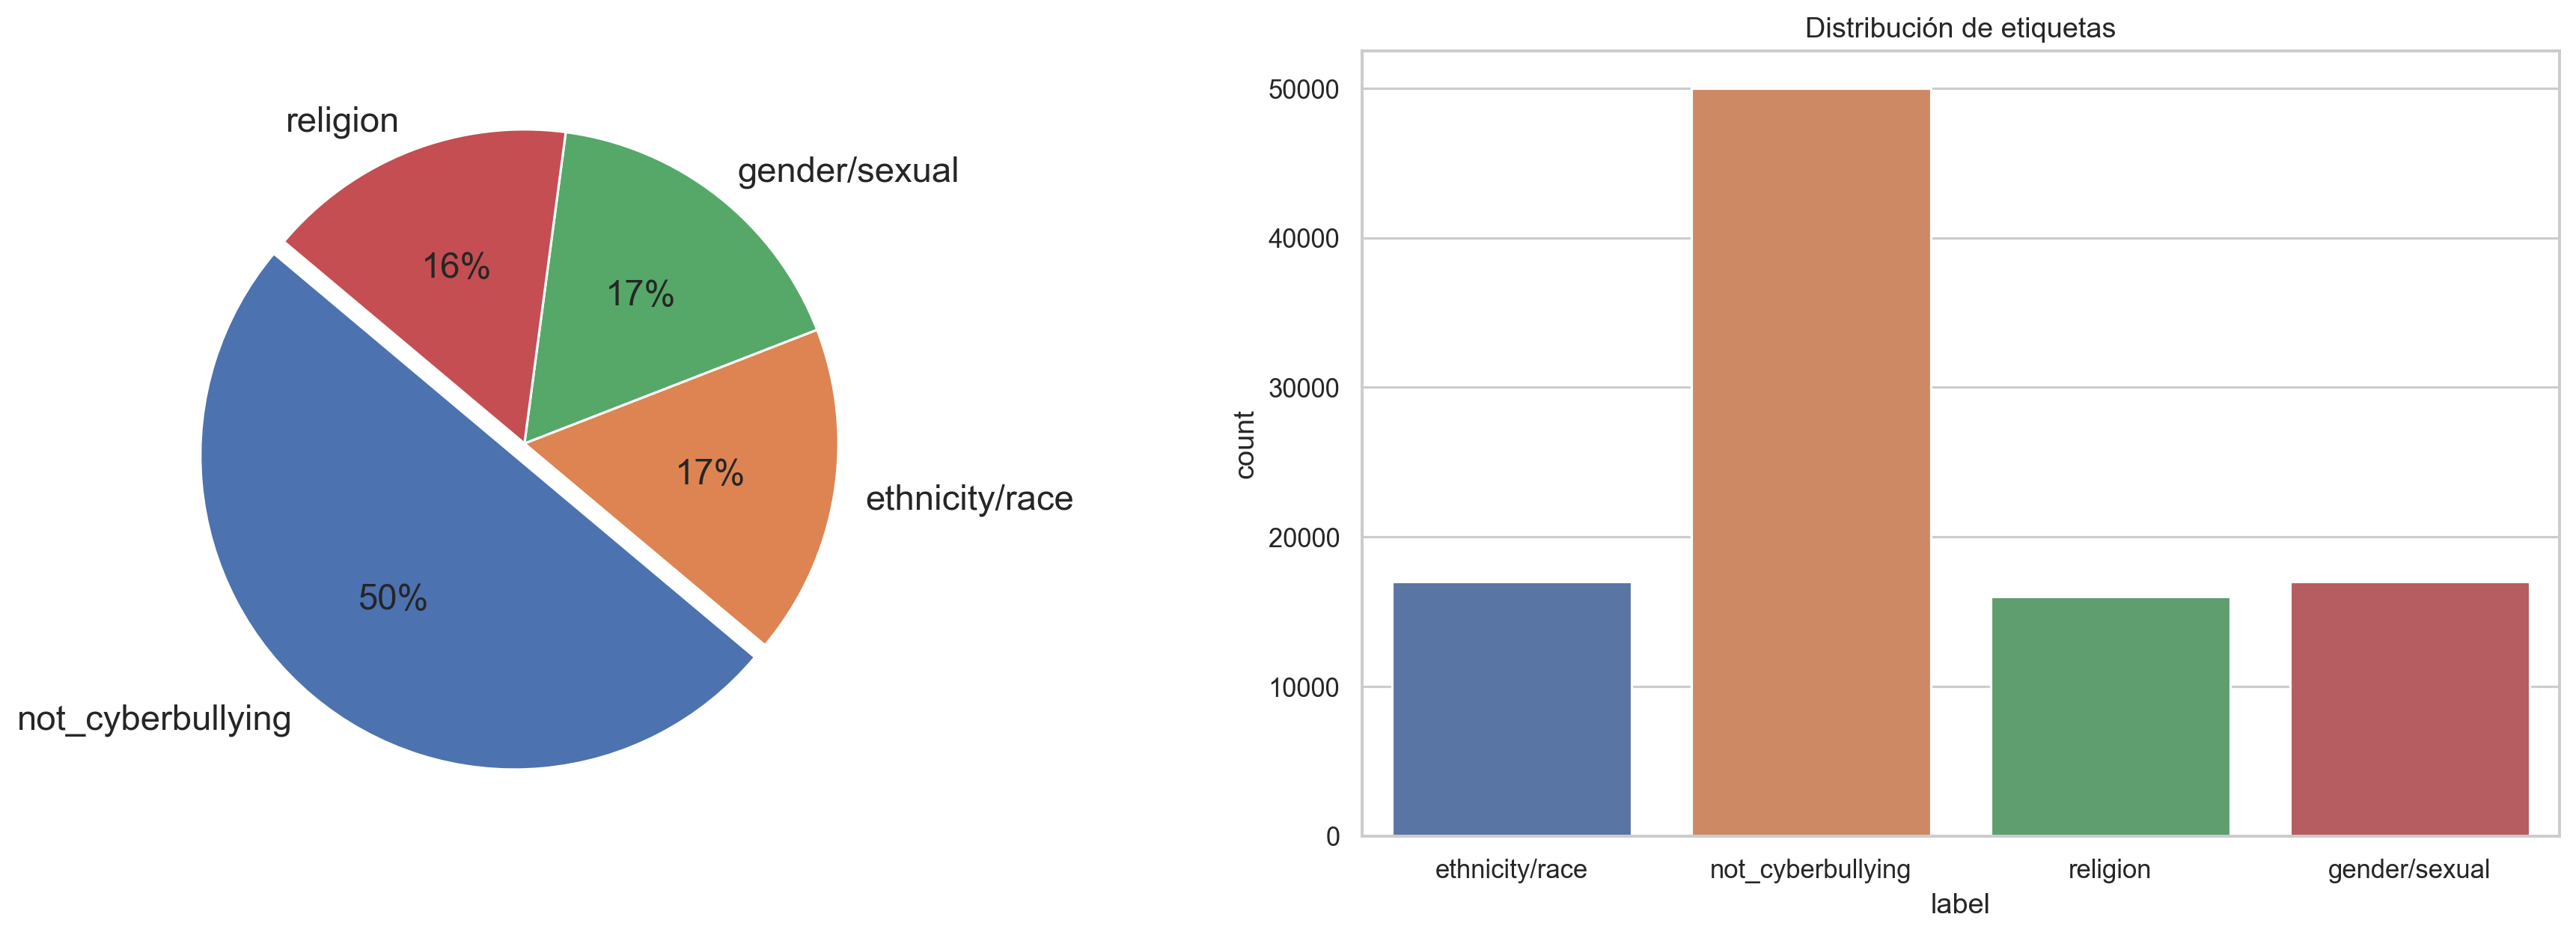

In [6]:

# Contamos las etiquetas
counts = df['label'].value_counts()
labels = counts.index          # nombres de las clases (por ejemplo: spam, ham)
dist = counts.to_numpy()       # valores numéricos (frecuencias)

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6), dpi=227)

# --- Primer gráfico: gráfico de pastel ---
plt.subplot(1, 2, 1)
plt.pie(
    dist,
    labels=labels,
    textprops={'fontsize': 15},
    startangle=140,
    autopct='%1.0f%%',
    explode=[0.05, 0, 0, 0]  # Corrected: Must be of length 'x', not 2
)

# --- Segundo gráfico: gráfico de barras ---
plt.subplot(1, 2, 2)
sns.countplot(data=df, x="label", hue="label")
plt.title("Distribución de etiquetas")

plt.show()

A partir de estas visualizaciones se observa que:

- La clase **not_cyberbullying** es claramente la más frecuente.
- Las clases **ethnicity**, **religion** y **gender** contienen menos al rededor de un tercio de los datos de la clase mayoritaria.
- Esto implica que el dataset presenta un **desbalance de clases**, lo cual debe ser considerado más adelante en el entrenamiento de los modelos (por ejemplo, mediante pesos de clase o técnicas de balanceo).


C:\Users\Valentina\AppData\Local\Temp\ipykernel_3068\1009534398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


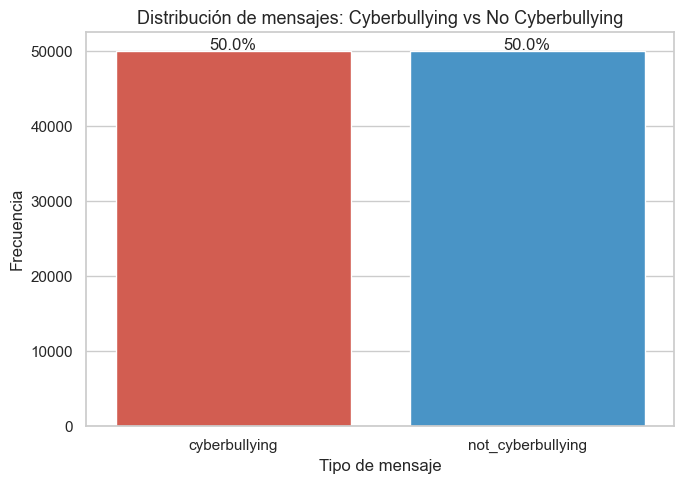

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear columna agrupada (si aún no la tienes)
df['bullying_group'] = df['label'].apply(
    lambda x: 'cyberbullying' if x != 'not_cyberbullying' else 'not_cyberbullying'
)

# --- Gráfico de barras ---
sns.set(style="whitegrid")

plt.figure(figsize=(7, 5))
sns.countplot(
    data=df,
    x='bullying_group',
    order=['cyberbullying', 'not_cyberbullying'],
    palette=['#E74C3C', '#3498DB']
)

plt.title("Distribución de mensajes: Cyberbullying vs No Cyberbullying", fontsize=13)
plt.xlabel("Tipo de mensaje")
plt.ylabel("Frecuencia")

# Mostrar porcentajes arriba de las barras
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        height + total*0.002,
        f'{(height/total)*100:.1f}%',
        ha='center'
    )

plt.tight_layout()
plt.show()


Para solucionar el desbalance se decidió agrupar los datos marcados con las etiquetas **ethnicity**, **religion** y **gender** en el grupo **cyberbullying**

**Conclusiones de la inspección inicial**

La exploración inicial del dataset permite concluir lo siguiente:

- El dataset está completo, no contiene valores nulos y está listo para preprocesamiento.
- La variable objetivo presenta **desbalance significativo**, lo que afectará el entrenamiento si no se aplican estrategias adecuadas.
- Los textos son relativamente cortos, coherentes con el dominio de redes sociales.
- El vocabulario incluye expresiones sensibles que justifican técnicas de normalización, limpieza, lematización y vectorización adecuadas.

Los resultados de esta inspección guían las decisiones de la siguiente sección, donde se detalla el preprocesamiento aplicado a los textos.


## **PREPROCESAMIENTO**

El preprocesamiento del texto es una etapa fundamental en los problemas de clasificación de lenguaje natural, ya que los modelos no pueden trabajar directamente con palabras, símbolos o caracteres sin un proceso previo de normalización. Con base en la inspección realizada en la sección anterior, se aplicaron los siguientes pasos de preprocesamiento para limpiar, transformar y preparar los textos del dataset para su vectorización y modelado.

In [8]:
test_df = df[['text', 'label']]
test_df.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


##Creamos un nuevo data frame

In [9]:
text_df = df[['text']]

Se creó un nuevo DataFrame llamado text_df que contiene únicamente la columna text, con el fin de trabajar de manera aislada sobre el contenido textual. Esto permite aplicar los procesos de limpieza y preprocesamiento del lenguaje natural sin alterar las demás variables del conjunto de datos.

#Lowercasing

Lowercasing: Conversión de mayuscula a minuscula

In [10]:
text_df['text_lower'] = text_df['text'].str.lower()
text_df[['text','text_lower']].head()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_3068\2579880952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_lower'] = text_df['text'].str.lower()


,text,text_lower
0,@ZubearSays Any real nigga isn't letting this ...,@zubearsays any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@moradoskittle @prolifejewess @daconsult @kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@jaydent2399 @tractorlaw @holmes_gael @erconge...


Se creó una nueva columna llamada text_lower en la cual se almacenó el contenido textual convertido a minúsculas. Este proceso es fundamental para la normalización del texto, ya que evita tratar como diferentes palabras que únicamente difieren en el uso de mayúsculas. Posteriormente, se visualizaron las primeras filas para comprobar la correcta aplicación de esta transformación.

#Removemos las URL

In [11]:
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

text_df['text_wo_urls'] = text_df['text'].apply(lambda text: remove_urls(text))
text_df[['text', 'text_wo_urls']].head()

,text,text_wo_urls
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se definió una función llamada remove_urls encargada de eliminar todas las direcciones URL presentes en el texto mediante el uso de expresiones regulares. Las URLs no aportan información útil para el análisis y suelen introducir ruido durante el proceso de vectorización, por lo que su eliminación mejora la calidad del preprocesamiento. Luego, se aplicó esta función a cada elemento de la columna text para generar una nueva columna denominada text_wo_urls. Finalmente, se visualizaron las primeras filas para confirmar el funcionamiento de la limpieza.

#Pasamos de emoji a texto

In [12]:
def emoji_to_text(text):
    return emoji.demojize(text)

text_df['text_emojis'] = text_df['text'].apply(emoji_to_text)
text_df[['text', 'text_emojis']].head()

,text,text_emojis
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se definió una función denominada emoji_to_text encargada de transformar los emojis presentes en el texto en sus equivalentes descriptivos mediante la función emoji.demojize(). Dado que los emojis contienen información relevante sobre emociones o intención, convertirlos a texto permite que los modelos de procesamiento de lenguaje natural puedan interpretarlos correctamente durante la vectorización. Posteriormente, esta función se aplicó a cada registro del dataset, generando una nueva columna llamada text_emojis. Finalmente, se visualizaron las primeras filas para comprobar la transformación

#Remover menciones

In [13]:
def remove_mentions(text):
  return re.sub(r'@\w+', '', text)

text_df['text_wo_mentions'] = text_df['text'].apply(lambda text: remove_mentions(text))
text_df[['text', 'text_wo_mentions']].head()

,text,text_wo_mentions
0,@ZubearSays Any real nigga isn't letting this ...,Any real nigga isn't letting this happen.
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,"I didn't even mention Mexico, but the US..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,And yet the MAGA want to do just that. Th...


Se definió una función denominada remove_mentions cuya finalidad es eliminar todas las menciones a usuarios presentes en el texto, identificadas por el patrón `@usuario`. Este proceso se realiza mediante expresiones regulares utilizando` re.sub()`. Las menciones no aportan información relevante para el análisis y solo incrementan el ruido en los modelos de NLP, por lo que su eliminación contribuye a obtener un texto más limpio y uniforme. Posteriormente, esta función fue aplicada a la columna text para generar una nueva columna llamada text_wo_mentions. Finalmente, se visualizaron las primeras filas para validar la transformación.

#Removemos la puntuación

In [14]:
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

text_df['text_wo_punct'] = text_df['text'].apply(lambda text: remove_punctuation(text))
text_df[['text', 'text_wo_punct']].head()

,text,text_wo_punct
0,@ZubearSays Any real nigga isn't letting this ...,ZubearSays Any real nigga isnt letting this ha...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,MoradoSkittle prolifejewess DAConsult KellyYod...
2,"the only thing i wish, i wish a nigga would",the only thing i wish i wish a nigga would
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,JaydenT2399 TractorLaw holmesgael erconger Acy...


Se definió una función denominada remove_punctuation que elimina todos los signos de puntuación presentes en el texto utilizando una tabla de traducción generada con `str.maketrans()` y aplicada mediante `translate()`. La eliminación de la puntuación es un paso común dentro del preprocesamiento de texto, ya que estos caracteres no aportan información semántica relevante y suelen introducir ruido durante la vectorización. La función fue aplicada a la columna text para generar una nueva columna denominada text_wo_punct. Posteriormente se visualizaron las primeras filas para verificar la transformación.

#Removemos las stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Valentina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Para poder utilizar las listas de palabras vacías (stopwords) proporcionadas por NLTK, fue necesario descargarlas mediante la instrucción `nltk.download('stopwords')`. Estas palabras de alta frecuencia generalmente no aportan significado semántico relevante, por lo que su posterior eliminación mejora la calidad del texto para los modelos de procesamiento de lenguaje natural.

In [16]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join(word for word in str(text).split() if word not in STOPWORDS)

text_df['text_wo_stop'] = text_df['text'].apply(lambda text: remove_stopwords(text))
text_df[['text', 'text_wo_stop']].head()

,text,text_wo_stop
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga letting happen.
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","thing wish, wish nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias friends Muslim idiots cheapless pe...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se creó un conjunto de palabras vacías (stopwords) utilizando el recurso stopwords de NLTK. Posteriormente, se definió una función llamada remove_stopwords que elimina todas aquellas palabras consideradas irrelevantes para el análisis semántico. Este proceso consiste en dividir el texto en tokens y filtrar aquellos que no pertenecen a la lista de stopwords, lo que permite reducir el ruido y la dimensionalidad del vocabulario. Esta función fue aplicada a cada registro del dataset para generar una nueva columna denominada text_wo_stop. Finalmente, se visualizaron las primeras filas para verificar la transformación.

#Removemos las palabras frecuentes

In [17]:
cnt = Counter()
for text in text_df['text'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('the', 53115),
 ('to', 43906),
 ('a', 43434),
 ('and', 34118),
 ('I', 31144),
 ('you', 27206),
 ('of', 27121),
 ('is', 25231),
 ('in', 22153),
 ('that', 17763)]

Se utilizó el objeto `Counter` de la librería collections para calcular la frecuencia de aparición de cada palabra dentro del conjunto de textos. Para ello, se recorrió cada documento del dataset y se dividió en palabras, incrementando el contador correspondiente en cada caso. Este proceso permitió identificar las palabras más frecuentes mediante el método `most_common(10)`. Este análisis es útil para comprender el vocabulario dominante y detectar posibles términos irrelevantes que deben ser filtrados durante el preprocesamiento del lenguaje natural.

In [18]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
  return " ".join(word for word in str(text).split() if word not in FREQWORDS)

text_df['text_wo_freq'] = text_df['text'].apply(lambda text: remove_freqwords(text))
text_df[['text', 'text_wo_freq']].head()

,text,text_wo_freq
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","only thing i wish, i wish nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends Muslim idiots chea...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se identificaron las palabras más frecuentes del corpus mediante el método `most_common(10)` del objeto `Counter`, obteniendo así un conjunto denominado FREQWORDS. Estas palabras suelen aparecer repetidamente en el dataset y, al no aportar información significativa para la clasificación, pueden generar ruido y sesgar el modelo. Por ello, se definió la función remove_freqwords, que elimina dichas palabras del texto mediante un filtrado basado en listas de comprensión. La función fue aplicada a la columna text para generar una nueva columna denominada text_wo_freq, y posteriormente se visualizaron las primeras filas para verificar la transformación.

#Conversion de chat words

In [19]:
# @title
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
lmfao= Laughing My Fucking Ass Off
mf= motherfucking
cnt=cunt
gtfo= get the fuck out
idgaf= I do not give a fuck
stfu= shut the fuck up
darn= damn
dang= damn
puss =pussy
kkk=  Ku Klux Klan
WPP= white power party
NSM= National socialist movement
ANP= American Nazi Party
AWB= Afrikaner Weerstandsbeweging
BNP= British National Party
Na= National Alliance
NSDAP= Nationalsozialistische Deutsche Arbeiterpartei
NAAWP= National Association for the Advancement of White People
CSA= Covenant, Sword and Arm of the Lord
CRWU= Christian Racist White Union
WAR=White Aryan Resistance
WSA= White Supremacist Alliance
WPWW= White Pride World Wide
"""

Se definió una cadena que contiene un glosario de términos propios del lenguaje informal usado en chats y redes sociales. Este glosario incluye abreviaturas, acrónimos, expresiones comunes, insultos abreviados y otros términos que suelen aparecer en textos informales. Su propósito es facilitar la posterior expansión de estas palabras hacia su forma completa, permitiendo que los modelos de procesamiento de lenguaje natural puedan interpretar de manera correcta el significado detrás de estas expresiones. La normalización de este tipo de vocabulario contribuye a reducir el ruido y a mejorar la comprensión semántica del texto por parte del modelo.

##Normalización de Chat Words (Acrónimos y Slang)

In [20]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
  if line != "":
    cw = line.split("=")[0]
    cw_expanded = line.split("=")[1]
    chat_words_list.append(cw)
    chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_words_list:
      new_text.append(chat_words_map_dict[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

text_df['text_chat_words'] = text_df['text'].apply(lambda text: chat_words_conversion(text))
text_df[['text', 'text_chat_words']].head()

,text,text_chat_words
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se convirtió el glosario de abreviaturas en un diccionario llamado chat_words_map_dict, donde cada abreviatura se mapea a su forma completa. Adicionalmente, se creó un conjunto (set) con todas las abreviaturas para realizar búsquedas eficientes. A continuación, se definió la función chat_words_conversion, encargada de recorrer cada palabra del texto y sustituir aquellas abreviaturas presentes en el diccionario por su equivalente expandido. Esta normalización es especialmente útil en textos informales o provenientes de redes sociales, donde este tipo de expresiones puede aportar información semántica relevante. Finalmente, se aplicó esta función a la columna text, generándose una nueva columna denominada text_chat_words, y se visualizaron las primeras filas para confirmar el correcto funcionamiento.


#Correcion de ortografia

In [21]:
def fix_contractions(text):
  return contractions.fix(text)

Se definió la función fix_contractions utilizando la librería contractions, cuya finalidad es expandir todas las contracciones del idioma inglés presentes en el texto hacia su forma completa. La expansión de contracciones es un paso fundamental en la normalización del lenguaje, ya que permite reducir el ruido en la tokenización y unificar el vocabulario, facilitando así la posterior vectorización y mejorando la interpretación semántica por parte de los modelos de NLP.

In [22]:
OFFENSIVE_WORDS = {"nigga", "niggas","lol", "benzos", "sksksk", "maga","bitch","muslim","muslims","islam","ass","rape","amp","fuck","hindu","islamic","religion","idiot","black","white","idiot", "stupid", "moron", "dumb", "loser", "fool", "jerk","asshole", "bastard", "bitch", "son of a bitch", "dick", "dickhead","faggot", "slut", "whore", "cunt", "fuck", "fucker", "motherfucker","shit", "bullshit", "piss", "crap", "damn", "hell","nigger", "chink", "spic", "kike", "wop", "gook", "beaner","sucker", "douche", "douchebag", "prick", "twat", "wanker", "bugger","cock", "pussy", "boobs", "tits", "ass", "arse", "buttfuck", "cum","screw", "jerkoff", "masturbate", "orgasm", "rape", "molest", "penis", "vagina",}

Se definió un conjunto denominado OFFENSIVE_WORDS que contiene una lista de palabras y expresiones comúnmente asociadas con lenguaje ofensivo, vulgar, discriminatorio o sexualmente explícito. Este conjunto funciona como una referencia para posteriores procesos de filtrado, normalización o detección de lenguaje tóxico dentro del texto. La utilización de un set permite realizar búsquedas eficientes y evitar duplicados. La identificación de este tipo de vocabulario es esencial en tareas de procesamiento del lenguaje natural orientadas a la moderación de contenido, detección de discurso de odio o clasificación de mensajes con lenguaje inapropiado.

In [23]:
from spellchecker import SpellChecker

# --- configuración ---
spell = SpellChecker(distance=1)
OFF_LC = {w.lower() for w in OFFENSIVE_WORDS}  # set de palabras ofensivas a ignorar
CORR_CACHE = {}

# --- función principal ---
def correct_spellings_fast(text, show_changes=False, log_file="correcciones.txt"):
    if not isinstance(text, str):
        return ""

    tokens = text.split()

    # Candidatas a revisar (solo letras, >2, no ofensivas y sin cache)
    to_check = {w.lower() for w in tokens
                if w.isalpha() and len(w) > 2
                and w.lower() not in OFF_LC
                and w.lower() not in CORR_CACHE}

    # Detecta las mal escritas
    misspelled = spell.unknown(to_check)

    # Completa cache (solo palabras nuevas)
    for w in to_check:
        correction = spell.correction(w)
        CORR_CACHE[w] = correction if (w in misspelled and correction is not None) else w

    # Reconstruye texto y muestra/guarda correcciones
    out = []
    with open(log_file, "a", encoding="utf-8") as f:
        for w in tokens:
            lw = w.lower()
            if lw in OFF_LC or not w.isalpha() or len(w) <= 2:
                out.append(w)
                continue
            corrected = CORR_CACHE.get(lw, lw)
            out.append(corrected)

            if corrected != lw:
                msg = f"🔤 {lw} → {corrected}"
                if show_changes:
                    print(msg)
                f.write(f"{lw} → {corrected}\n")

    return " ".join(out)




Se implementó una función denominada correct_spellings_fast para realizar una corrección ortográfica eficiente y segura dentro del preprocesamiento de texto. Esta función utiliza la librería spellchecker, junto con un sistema de filtrado y un mecanismo de caché que permite reducir significativamente el tiempo de procesamiento.

Únicamente se corrigen palabras alfabéticas de más de dos caracteres, excluyendo explícitamente aquellas clasificadas como ofensivas o sensibles para evitar alterar el contenido semántico relevante. Las correcciones se almacenan en memoria mediante un diccionario de caché, lo que evita recalcular correcciones repetidas. Finalmente, la función reconstruye el texto corregido y registra las correcciones realizadas en un archivo externo. Este sistema permite obtener textos más limpios y coherentes sin afectar información crítica para tareas de análisis de sentimiento o detección de toxicidad.

#lematización

In [24]:

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Valentina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Valentina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Valentina\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Valentina\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Para permitir el uso de diversas herramientas de procesamiento de lenguaje natural provistas por NLTK, fue necesario descargar varios recursos lingüísticos adicionales.

El paquete punkt habilita los tokenizadores para segmentar texto en palabras y oraciones. El recurso wordnet proporciona la base léxica necesaria para ejecutar procesos de lematización, mientras que omw-1.4 amplía esta información con soporte multilingüe. Finalmente, el paquete averaged_perceptron_tagger_eng permite realizar el etiquetado gramatical (POS tagging), esencial para determinar la función sintáctica de cada palabra y mejorar la precisión en la lematización y el análisis semántico.

In [25]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_words(text):
    return " ".join(lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in text.split())


Se implementó un proceso de lematización utilizando `WordNetLemmatizer`, con el objetivo de reducir cada palabra a su forma base o “lema”. Para lograr una lematización precisa, se definió la función get_wordnet_pos, la cual obtiene la categoría gramatical de cada palabra mediante el etiquetador POS de NLTK y la traduce al formato requerido por WordNet.

La función lemmatize_words aplica esta información para lematizar cada palabra de acuerdo con su función sintáctica, lo cual permite normalizar el texto de forma semánticamente coherente. Este procedimiento contribuye a disminuir la variabilidad del vocabulario y a mejorar la calidad de la representación textual utilizada en modelos de procesamiento del lenguaje natural.

##Hacemos la conversion sobre cada linea de texto

In [26]:
test_df['chat_words'] = test_df['text'].apply(lambda text: chat_words_conversion(text))
test_df[['text', 'chat_words']].head()

,text,chat_words
0,@ZubearSays Any real nigga isn't letting this ...,@ZubearSays Any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,You saudias are not friends of Muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


Se aplicó la función chat_words_conversion a cada registro del conjunto de datos con el fin de convertir abreviaturas y expresiones propias del lenguaje informal de internet a sus equivalentes textuales completos.

La operación se realizó utilizando el método apply, generando una nueva columna denominada chat_words, donde se almacena el texto ya convertido. Finalmente, se visualizaron las primeras filas del DataFrame para comparar el texto original con su versión normalizada.

##Convertimos el texto a minusculas

In [27]:
test_df['lower'] = test_df['chat_words'].str.lower()
test_df[['chat_words', 'lower']].head()

,chat_words,lower
0,@ZubearSays Any real nigga isn't letting this ...,@zubearsays any real nigga isn't letting this ...
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,@moradoskittle @prolifejewess @daconsult @kell...
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,You saudias are not friends of Muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,@jaydent2399 @tractorlaw @holmes_gael @erconge...


Se aplicó una conversión a minúsculas sobre la columna chat_words con el objetivo de unificar la representación textual. Este paso evita que una misma palabra sea tratada como diferente por variaciones en el uso de mayúsculas, lo cual reduce el tamaño del vocabulario, elimina redundancias y mejora la calidad de las posteriores tareas de tokenización y vectorización. El resultado de esta normalización se almacenó en una nueva columna denominada lower, y se visualizaron las primeras filas del conjunto de datos para comparar el texto original con su versión estandarizada.

##Removemos las menciones

In [28]:
test_df['wo_mentions'] = test_df['lower'].apply(lambda text: remove_mentions(text))
test_df[['lower', 'wo_mentions']].head()

,lower,wo_mentions
0,@zubearsays any real nigga isn't letting this ...,any real nigga isn't letting this happen.
1,@moradoskittle @prolifejewess @daconsult @kell...,"i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,@jaydent2399 @tractorlaw @holmes_gael @erconge...,and yet the maga want to do just that. th...


Se eliminó del texto toda referencia a menciones de usuarios, es decir, palabras que inician con el símbolo @, comunes en publicaciones de redes sociales. Estas menciones no aportan contenido semántico relevante y suelen introducir ruido dentro del proceso de vectorización, ya que cada usuario representa un token único y no significativo para el modelo.

Para ello se aplicó la función remove_mentions a la columna previamente normalizada en minúsculas, generando una nueva columna denominada wo_mentions. La correcta eliminación de estos elementos se verificó mediante la visualización comparativa de las primeras filas del DataFrame.

##Removemos las url

In [29]:
test_df['wo_urls'] = test_df['wo_mentions'].apply(lambda text: remove_urls(text))
test_df[['wo_mentions', 'wo_urls']].head()

,wo_mentions,wo_urls
0,any real nigga isn't letting this happen.,any real nigga isn't letting this happen.
1,"i didn't even mention mexico, but the us...","i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that. th...


Se eliminó del texto cualquier URL presente en los mensajes, ya que los enlaces web no aportan información semántica relevante y tienden a introducir ruido innecesario en el proceso de vectorización. Para ello se aplicó la función remove_urls a la columna previamente procesada (wo_mentions), generando una nueva columna denominada wo_urls. Esta operación contribuye a reducir la dimensionalidad del vocabulario y mejora la calidad del preprocesamiento. La correcta eliminación de las URLs se verificó mediante la visualización comparativa de las primeras filas.

##Reemplazamos los emojis por textos




In [30]:
test_df['wo_emo'] = test_df['wo_urls'].apply(lambda text:emoji_to_text(text))
test_df[['wo_urls', 'wo_emo']].head()

,wo_urls,wo_emo
0,any real nigga isn't letting this happen.,any real nigga isn't letting this happen.
1,"i didn't even mention mexico, but the us...","i didn't even mention mexico, but the us..."
2,"the only thing i wish, i wish a nigga would","the only thing i wish, i wish a nigga would"
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that. th...


Se aplicó la función emoji_to_text sobre la columna wo_urls con el fin de convertir todos los emojis presentes en el texto en su equivalente descriptivo. Los emojis contienen información emocional relevante, pero no pueden ser interpretados directamente por los modelos de procesamiento de lenguaje natural. Al sustituirlos por su descripción textual mediante la librería emoji, se mejora la capacidad del modelo para captar sentimientos y matices del mensaje.

El resultado se almacenó en una nueva columna denominada wo_emo, y se compararon las primeras filas para verificar el correcto funcionamiento de la transformación.

##Removemos las puntuaciones



In [31]:
test_df['wo_punct'] = test_df['wo_emo'].apply(lambda text: remove_punctuation(text))
test_df[['wo_emo', 'wo_punct']].head()

,wo_emo,wo_punct
0,any real nigga isn't letting this happen.,any real nigga isnt letting this happen
1,"i didn't even mention mexico, but the us...",i didnt even mention mexico but the us i...
2,"the only thing i wish, i wish a nigga would",the only thing i wish i wish a nigga would
3,you saudias are not friends of muslim idiots c...,you saudias are not friends of muslim idiots c...
4,and yet the maga want to do just that. th...,and yet the maga want to do just that the...


Se aplicó un proceso de eliminación de signos de puntuación utilizando la función remove_punctuation, con el objetivo de limpiar el texto de símbolos que no aportan significado semántico relevante. La puntuación introduce ruido dentro del proceso de vectorización y genera tokens innecesarios, por lo que su eliminación contribuye a reducir la dimensionalidad del vocabulario y a mejorar la consistencia del preprocesamiento. El texto resultante se almacenó en la nueva columna wo_punct, y se verificó el funcionamiento mediante una comparación con la columna original wo_emo.

##Removemos las stopwords

In [32]:
test_df['wo_stop'] = test_df['wo_punct'].apply(lambda text: remove_stopwords(text))
test_df[['wo_punct', 'wo_stop']].head()

,wo_punct,wo_stop
0,any real nigga isnt letting this happen,real nigga isnt letting happen
1,i didnt even mention mexico but the us i...,didnt even mention mexico us far safest place ...
2,the only thing i wish i wish a nigga would,thing wish wish nigga would
3,you saudias are not friends of muslim idiots c...,saudias friends muslim idiots cheapless people
4,and yet the maga want to do just that the...,yet maga want judah christian muslim believe s...


Se eliminó del texto el conjunto de stopwords utilizando la función remove_stopwords. Las stopwords corresponden a palabras muy frecuentes en el idioma que no aportan información semántica relevante y, por el contrario, introducen ruido en el proceso de vectorización. Al eliminarlas, se reduce la dimensionalidad del vocabulario y se facilita que los modelos de aprendizaje automático identifiquen patrones significativos.

El resultado de esta limpieza se almacenó en la nueva columna wo_stop, y se verificó su correcto funcionamiento comparando las primeras filas con el texto original sin puntuación.

##Removemos las palabras frecuentes

In [33]:
test_df['wo_fr'] = test_df['wo_stop'].apply(lambda text: remove_freqwords(text))
test_df[['wo_stop', 'wo_fr']].head()

,wo_stop,wo_fr
0,real nigga isnt letting happen,real nigga isnt letting happen
1,didnt even mention mexico us far safest place ...,didnt even mention mexico us far safest place ...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudias friends muslim idiots cheapless people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


Se aplicó un proceso de eliminación de palabras frecuentes (frequent words) mediante la función remove_freqwords. Estas palabras corresponden a los términos más repetidos del corpus y suelen carecer de valor discriminativo para las tareas de clasificación o análisis semántico. Su eliminación permite reducir el ruido, destacar vocabulario más relevante y mejorar la capacidad del modelo para identificar patrones significativos.

El texto resultante se almacenó en la columna wo_fr, y se validó la transformación mediante la comparación visual de las primeras filas con la columna anterior wo_stop.

##Eliminar contracciones

In [34]:
test_df['wo_contract'] = test_df['wo_fr'].apply(lambda text: fix_contractions(text))
test_df[['wo_fr', 'wo_contract']].head()


,wo_fr,wo_contract
0,real nigga isnt letting happen,real nigga is not letting happen
1,didnt even mention mexico us far safest place ...,did not even mention mexico us far safest plac...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudias friends muslim idiots cheapless people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


Se aplicó la función fix_contractions sobre la columna wo_fr con el propósito de expandir todas las contracciones del idioma inglés a su forma completa. Este proceso utiliza la librería `contractions`, que identifica automáticamente estas formas abreviadas y las transforma en expresiones completas, como “don’t” → “do not” o “can’t” → “cannot”.

La expansión de contracciones mejora la calidad del preprocesamiento al evitar errores de tokenización y facilitar procesos posteriores como la lematización y la vectorización. El resultado de esta transformación se almacenó en la nueva columna wo_contract, y se verificó mediante una comparación visual de las primeras filas.

##Corregimos la ortografia

In [35]:
test_df['wo_orto'] = test_df['wo_contract'].apply(lambda text: correct_spellings_fast(text))
test_df[['wo_contract', 'wo_orto']].head()




,wo_contract,wo_orto
0,real nigga is not letting happen,real nigga is not letting happen
1,did not even mention mexico us far safest plac...,did not even mention mexico us far safest plac...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudias friends muslim idiots cheapless people,saudi's friends muslim idiots cheapness people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


Se aplicó la función fix_contractions a la columna wo_fr con el objetivo de expandir todas las contracciones del idioma inglés hacia su forma completa. La librería `contractions` identifica automáticamente contracciones tales como “don’t”, “isn’t” o “I’m” y las convierte en “do not”, “is not” e “I am”, respectivamente. Este proceso mejora significativamente la calidad del texto procesado, pues evita errores de tokenización, facilita la lematización y genera una representación más coherente para los modelos de procesamiento del lenguaje natural. El resultado se almacenó en la columna wo_contract y se validó visualmente mediante la comparación de las primeras filas del DataFrame.

##Hacemos la lematizacion

In [36]:

# Perform lemmatization
test_df['wo_lema'] = test_df['wo_orto'].apply(lambda text: lemmatize_words(text))
test_df[['wo_orto', 'wo_lema']].head()

,wo_orto,wo_lema
0,real nigga is not letting happen,real nigga be not let happen
1,did not even mention mexico us far safest plac...,do not even mention mexico u far safest place ...
2,thing wish wish nigga would,thing wish wish nigga would
3,saudi's friends muslim idiots cheapness people,saudi's friend muslim idiot cheapness people
4,yet maga want judah christian muslim believe s...,yet maga want judah christian muslim believe s...


Se realizó el proceso de lematización sobre la columna wo_orto utilizando la función lemmatize_words. Este procedimiento reduce cada palabra a su forma base (lema), teniendo en cuenta su categoría gramatical mediante la integración del etiquetador POS de NLTK y el diccionario léxico WordNet. La lematización permite disminuir la variabilidad del vocabulario y produce un texto semánticamente más uniforme, lo cual mejora la calidad de la vectorización y contribuye al rendimiento de los modelos de aprendizaje automático. El resultado se almacenó en la columna wo_lema y se validó mediante la inspección de las primeras filas del conjunto de datos.

##Nube de palabras

<Figure size 640x480 with 0 Axes>

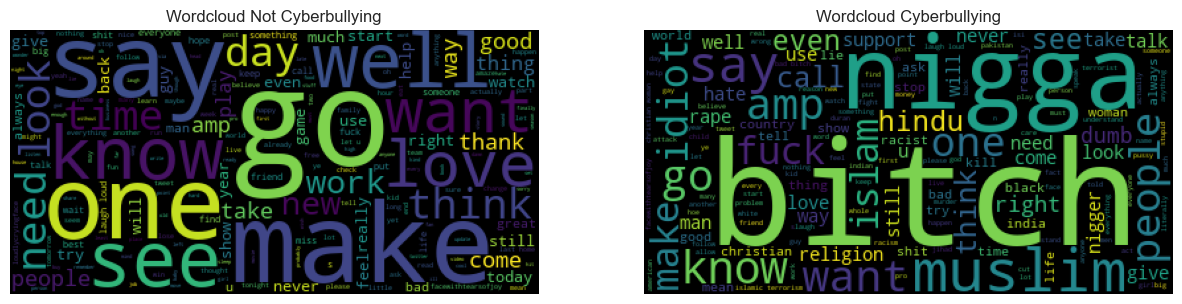

In [37]:
test_df['bullying_group'] = np.where(
    test_df['label'] == 'not_cyberbullying',
    'not_cyberbullying',
    'cyberbullying'
)

text_0 = test_df[test_df['bullying_group'] == 'not_cyberbullying']['wo_lema'].str.cat(sep=' ')
text_1 = test_df[test_df['bullying_group'] == 'cyberbullying']['wo_lema'].str.cat(sep=' ')

wordcloud1 = WordCloud().generate(text_0)
wordcloud2 = WordCloud().generate(text_1)

plt.figure()
f, axarr = plt.subplots(1,2)

axarr[0].imshow(wordcloud1)
axarr[1].imshow(wordcloud2)
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].set_title('Wordcloud Not Cyberbullying')
axarr[1].set_title('Wordcloud Cyberbullying')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

Se creó una nueva columna denominada bullying_group para reducir el número de categorías a dos clases principales: cyberbullying y not_cyberbullying. Posteriormente, se concatenaron los textos lematizados de cada grupo para generar dos corpus independientes, sobre los cuales se construyeron nubes de palabras mediante la librería WordCloud.

Las nubes de palabras permiten identificar los términos más frecuentes en cada categoría, mostrando patrones lingüísticos característicos del cyberbullying (por ejemplo, insultos o expresiones agresivas) frente al lenguaje normal. Estas visualizaciones sirven tanto para el análisis exploratorio del dataset como para justificar diferencias semánticas entre ambas clases. Finalmente, se representaron ambas nubes en una figura de dos columnas para facilitar la comparación directa.

##Hacemos recuento de palabras comunes entre las 2 categorias

In [38]:
test_df['tokens'] = test_df['wo_lema'].apply(lambda x: x.split())
palabras_not_cyber = set(
    [word for tokens in test_df[test_df['bullying_group'] == 'not_cyberbullying']['tokens'] for word in tokens]
)
palabras_cyber = set(
    [word for tokens in test_df[test_df['bullying_group'] == 'cyberbullying']['tokens'] for word in tokens]
)
palabras_comunes = palabras_not_cyber.intersection(palabras_cyber)
print(f"Palabras comunes: {len(palabras_comunes)}")

Palabras comunes: 15928


Se añadió una columna denominada tokens, donde cada texto previamente lematizado fue dividido en palabras individuales. A partir de esta tokenización, se construyeron dos conjuntos de vocabulario: uno correspondiente a los textos clasificados como not_cyberbullying y otro para los textos etiquetados como cyberbullying.

El uso de conjuntos (set) permite obtener el vocabulario único de cada grupo al eliminar duplicados. Posteriormente, se calculó la intersección entre ambos conjuntos para identificar las palabras que aparecen en ambas categorías. Estas palabras comunes representan el vocabulario neutral compartido entre textos normales y textos de acoso, y su análisis es útil para entender qué términos no contribuyen a diferenciar ambas clases. Finalmente, se imprimió la cantidad total de palabras comunes encontradas.

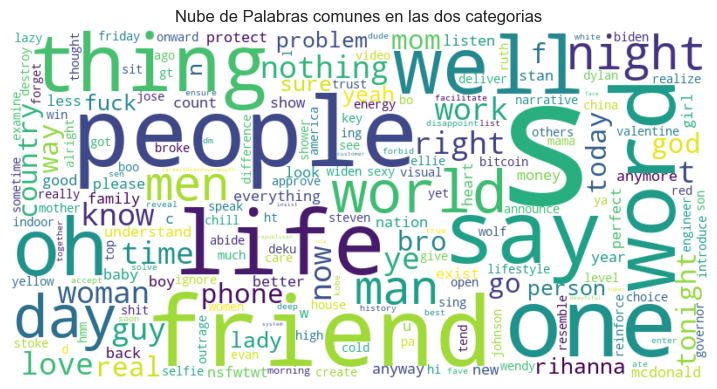

In [39]:
#@title Nube las palabras comunes en las dos categorias
# Convertir los elementos de palabras_comunes a cadenas de texto
palabras_comunes_str = [str(palabra) for palabra in palabras_comunes]

# Crear una cadena de texto con las palabras comunes
texto_comun = ' '.join(palabras_comunes_str)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_comun)

# Mostrar la nube de palabras
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras comunes en las dos categorias')
plt.show()

Se generó una nube de palabras utilizando el conjunto palabras_comunes, que contiene los términos presentes tanto en la clase cyberbullying como en not_cyberbullying. Para ello, se convirtieron las palabras a formato de cadena y se unieron en un único texto, el cual fue utilizado para construir la nube mediante la librería WordCloud.

La visualización permite identificar de manera gráfica el vocabulario neutral compartido entre ambas categorías. Estas palabras, al no ser exclusivas de ninguna clase, suelen aportar poca capacidad discriminativa a los modelos de clasificación, por lo que su análisis es útil para comprender el comportamiento del corpus y para tomar decisiones respecto al preprocesamiento o selección de características. La nube generada muestra este vocabulario común y facilita la interpretación del contenido de ambas clases.

In [40]:

# 1) Elegir columna de texto limpia
text_col = 'wo_lema' if 'wo_lema' in df.columns else ('cleaned_text' if 'cleaned_text' in df.columns else 'text')

# 2) Pasar a formato “tidy” (una palabra por fila)
tmp = df[['bullying_group', text_col]].dropna().copy()
tmp[text_col] = tmp[text_col].astype(str)
texto_tidy = (
    tmp.assign(token_list=tmp[text_col].str.split())
       .explode('token_list')
       .rename(columns={'token_list':'token'})
       .query("token.str.len() > 1", engine='python')
)

# 3) Conteos por (clase, token)
pivot = (
    texto_tidy.groupby(['bullying_group','token'])['token']
              .count().rename('count').reset_index()
              .pivot(index='token', columns='bullying_group', values='count')
              .fillna(0.0)
)
pivot.columns.name = None

# 4) Totales por clase (N) para suavizado
N = texto_tidy.groupby('bullying_group')['token'].count().to_dict()

# 5) Odds con suavizado de Laplace (+1)
#    Definimos positivo = más característico de "cyberbullying"
cyb = pivot.get('cyberbullying', 0.0)
notcyb = pivot.get('not_cyberbullying', 0.0)
odds_cyb    = (cyb + 1) / (N.get('cyberbullying', 0) + 1)
odds_notcyb = (notcyb + 1) / (N.get('not_cyberbullying', 0) + 1)

logodds = np.log(odds_cyb / odds_notcyb)

comentarios_logOdds = pd.DataFrame({
    'token': pivot.index,
    'odds_cyberbullying': odds_cyb.values,
    'odds_not_cyberbullying': odds_notcyb.values,
    'log_odds': logodds.values
}).set_index('token')

comentarios_logOdds['abs_log_odds'] = comentarios_logOdds['log_odds'].abs()
comentarios_logOdds['clase_frecuente'] = np.where(
    comentarios_logOdds['log_odds'] > 0, 'cyberbullying', 'not_cyberbullying'
)

# 6) Top palabras por clase
top_cyber = comentarios_logOdds.sort_values('log_odds', ascending=False).head(20)
top_not   = comentarios_logOdds.sort_values('log_odds', ascending=True).head(20)

print("Top términos característicos de CYBERBULLYING:")
print(top_cyber[['log_odds']])

print("\nTop términos característicos de NOT_CYBERBULLYING:")
print(top_not[['log_odds']])


Top términos característicos de CYBERBULLYING:
           log_odds
token              
bitch      9.126558
nigga      8.717277
Muslim     8.151909
Muslims    7.568862
Nigga      7.450014
Islam      7.259190
rape       7.255316
niggas     6.907131
Islamic    6.879254
muslim     6.862148
Hindu      6.776638
dumb       6.676658
Hindus     6.498568
Bitch      6.496498
nigger     6.465985
bitch.     6.464916
radical    6.454163
Christian  6.419516
terrorist  6.344590
muslims    6.318932

Top términos característicos de NOT_CYBERBULLYING:
             log_odds
token                
🔹H4🔹        -5.590566
"'          -5.379577
TL,         -5.146315
؟?          -5.129221
نمشے        -5.094129
profits,    -4.841539
#推特账号       -4.794471
#推特刷粉丝      -4.770080
here:       -4.763888
Basketball  -4.732339
everybody's -4.699763
🔹W77🔹       -4.666090
#NFT        -4.550018
using???    -4.518765
using?????  -4.486504
--&gt;      -4.453168
Visit:      -4.436073
ETH         -4.436073
glitch      -4.409871

Se aplicó un análisis léxico basado en log-odds con suavizado de Laplace para identificar las palabras más características de cada categoría del dataset (cyberbullying y not_cyberbullying).

Primero se transformó el corpus en formato tidy text, donde cada fila representa un token asociado a su clase. Posteriormente, se calcularon las frecuencias de cada palabra por categoría mediante una tabla dinámica. Con esta información se estimaron las probabilidades suavizadas para cada clase y se calculó el log-odds ratio, una medida que indica qué tan distintiva es una palabra para una categoría en comparación con la otra.

Las palabras con log-odds positivos son más representativas de cyberbullying, mientras que las negativas caracterizan a not_cyberbullying. Finalmente, se extrajeron los 20 términos más distintivos de cada clase, lo cual proporciona información valiosa para interpretación semántica, análisis exploratorio y selección de características para modelos de clasificación.

In [41]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
comentarios_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,odds_cyberbullying,odds_not_cyberbullying,log_odds,abs_log_odds,clase_frecuente
token,,,,,
bitch,0.011192,0.000001,9.126558,9.126558,cyberbullying
nigga,0.007433,0.000001,8.717277,8.717277,cyberbullying
Muslim,0.004223,0.000001,8.151909,8.151909,cyberbullying
Muslims,0.002357,0.000001,7.568862,7.568862,cyberbullying
Nigga,0.002093,0.000001,7.450014,7.450014,cyberbullying
Islam,0.001729,0.000001,7.259190,7.259190,cyberbullying
rape,0.001723,0.000001,7.255316,7.255316,cyberbullying
niggas,0.001216,0.000001,6.907131,6.907131,cyberbullying
Islamic,0.001183,0.000001,6.879254,6.879254,cyberbullying


Se seleccionaron las 10 palabras más diferenciadoras entre las categorías cyberbullying y not_cyberbullying ordenando el conjunto de tokens según el valor absoluto del log-odds. Este valor refleja la magnitud con que una palabra favorece una u otra clase, independientemente del signo.

Las palabras con mayor abs_log_odds representan los términos que más contribuyen a distinguir semánticamente los textos de acoso de aquellos que no lo son. Esta información es fundamental para comprender el comportamiento lingüístico de ambas clases y para identificar características relevantes que pueden mejorar la eficacia de los modelos de clasificación.

##Top 15 palabras más características de cada categoria

C:\Users\Valentina\AppData\Local\Temp\ipykernel_3068\1868384583.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \


Text(0.5, 0, 'log odds ratio (cyberbullying / not_cyberbullying)')

C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 36134 (\N{CJK UNIFIED IDEOGRAPH-8D26}) missing from font(s) Arial.
  func(*args, **kwargs)
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21495 (\N{CJK UNIFIED IDEOGRAPH-53F7}) missing from font(s) Arial.
  func(*args, **

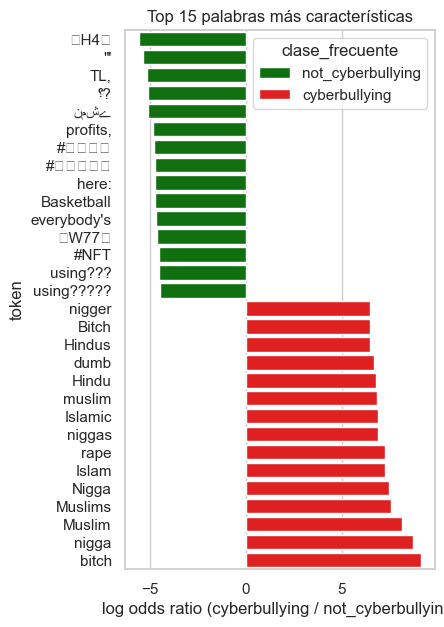

In [42]:


top_30 = comentarios_logOdds[['log_odds', 'abs_log_odds', 'clase_frecuente']] \
        .groupby('clase_frecuente') \
        .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(4, 7))
sns.barplot(
    x='log_odds',
    y='token',
    hue='clase_frecuente',
    data=top_30,
    ax=ax,
    palette={'cyberbullying': 'red', 'not_cyberbullying': 'green'}
)
ax.set_title('Top 15 palabras más características')
ax.set_xlabel('log odds ratio (cyberbullying / not_cyberbullying)')

Se generó una visualización basada en el cálculo del log-odds ratio con suavizado de Laplace para identificar las palabras más representativas de cada categoría del dataset.

Primero, se seleccionaron las 15 palabras más diferenciadoras por clase utilizando el valor absoluto del log-odds. Esto permitió identificar los tokens con mayor capacidad de discriminar entre textos de cyberbullying y not_cyberbullying.

Posteriormente, se construyó un gráfico de barras donde el eje X representa el log-odds ratio y el eje Y muestra las palabras seleccionadas. Los valores positivos indican términos asociados a la clase cyberbullying, mientras que los negativos corresponden a la clase not_cyberbullying. La visualización final permite interpretar de manera clara qué vocabulario caracteriza a cada grupo y facilita la comprensión de las diferencias lingüísticas entre ambas categorías.

##Análisis de Frecuencias y TF-IDF por Tipo de Bullying

In [43]:
assert 'bullying_group' in test_df.columns
assert 'wo_lema' in test_df.columns

# 1) Tokenizar y “explode”
tokens_df = test_df[['bullying_group', 'wo_lema']].dropna().copy()
tokens_df['tokens'] = tokens_df['wo_lema'].astype(str).apply(lambda x: x.split())
tokens_exploded = tokens_df.explode('tokens').rename(columns={'tokens': 'token'})
tokens_exploded['token'] = tokens_exploded['token'].str.strip()
tokens_exploded = tokens_exploded[tokens_exploded['token'].str.len() > 1]

# 2) TF por grupo (frecuencia normalizada)
tf = (tokens_exploded
      .groupby(['bullying_group', 'token'])
      .size().reset_index(name='count'))
tf['total_count'] = tf.groupby('bullying_group')['count'].transform('sum')
tf['tf'] = tf['count'] / tf['total_count']

# 3) IDF por “número de grupos en los que aparece el token”
n_grupos = tokens_exploded['bullying_group'].nunique()  # normalmente 2
df_groups = (tokens_exploded.groupby('token')['bullying_group']
             .nunique().reset_index(name='n_grupos_token'))

# IDF suavizado: ln( (G + 1) / (df_g + 1) ) + 1  -> evita 0 y mantiene señal
df_groups['idf'] = np.log((n_grupos + 1) / (df_groups['n_grupos_token'] + 1)) + 1.0

# 4) TF-IDF final por (grupo, token)
tf_idf = tf.merge(df_groups[['token','idf']], on='token', how='left')
tf_idf['tf_idf'] = tf_idf['tf'] * tf_idf['idf']


Se implementó el cálculo manual de TF-IDF por grupo con el objetivo de identificar el vocabulario más representativo de las categorías cyberbullying y not_cyberbullying.

Primero, el texto fue tokenizado y transformado al formato tidy text, donde cada fila corresponde a una palabra asociada a su clase. Posteriormente, se calculó el Term Frequency (TF) como la proporción de apariciones de cada token dentro de cada grupo.

Para el Inverse Document Frequency (IDF) se empleó una adaptación basada en grupos, donde el DF representa el número de clases en las que aparece cada token. Se utilizó un IDF suavizado con el fin de evitar divisiones por cero y estabilizar los valores.

Finalmente, el TF-IDF se obtuvo como el producto entre TF e IDF, generando una medida que permite identificar qué palabras son más distintivas para cada clase. Este procedimiento es fundamental para análisis exploratorio, selección de características y comprensión semántica del corpus.

###Principales Términos Discriminativos por Grupo (Top-20)

In [44]:
top_words = (tf_idf
             .sort_values(['bullying_group', 'tf_idf'], ascending=[True, False])
             .groupby('bullying_group')
             .head(20))

top_words[['bullying_group', 'token', 'tf_idf']]

,bullying_group,token,tf_idf
28114,cyberbullying,nigga,0.027918
5555,cyberbullying,bitch,0.025338
27203,cyberbullying,muslim,0.024726
4878,cyberbullying,be,0.024546
28607,cyberbullying,not,0.016693
11812,cyberbullying,do,0.011912
23763,cyberbullying,like,0.010374
16441,cyberbullying,get,0.009280
35300,cyberbullying,say,0.008086
18577,cyberbullying,hindu,0.006950


Se seleccionaron las palabras más representativas de cada clase utilizando el valor de TF-IDF previamente calculado. Para ello, los tokens fueron ordenados primero por categoría (cyberbullying y not_cyberbullying) y luego por su peso TF-IDF en orden descendente.

Posteriormente, se extrajeron los 20 términos con mayor TF-IDF para cada categoría, obteniendo así las palabras con mayor capacidad discriminativa dentro de cada grupo. Estas palabras constituyen el vocabulario más relevante para diferenciar entre mensajes de acoso y mensajes no ofensivos, y pueden utilizarse como características significativas para modelos de clasificación o análisis semántico.

Finalmente, se mostraron las columnas bullying_group, token y tf_idf para facilitar la interpretación de los resultados


In [45]:
def _image_url_to_base64(image_url: str):
    from urllib.parse import urlparse
    allowed_hosts = ["cdn.example.com", "images.example.com"]

    parsed = urlparse(image_url)
    if parsed.hostname not in allowed_hosts:
        return None

    response = requests.get(image_url, stream=True, timeout=5)
    if not response.headers.get("Content-Type", "").startswith("image/"):
        return None

    return base64.b64encode(response.content).decode()


Se implementó una función denominada _image_url_to_base64 cuyo propósito es validar, descargar y convertir imágenes remotas a formato Base64. Para garantizar la seguridad del sistema, la función únicamente acepta URLs cuyo dominio pertenezca a una lista blanca definida por las variables allowed_hosts.

Una vez verificado el dominio, la función descarga el recurso mediante una solicitud HTTP y comprueba que el encabezado Content-Type corresponda a una imagen válida. Si la verificación es correcta, el archivo se convierte a Base64, lo cual permite manipular y transmitir la imagen como una cadena de texto segura y portátil. En caso de que cualquiera de las validaciones falle, la función retorna None, evitando así el procesamiento de contenido no autorizado o potencialmente peligroso.

#Division de datos y conjuntos de prueba

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

datos_X = test_df['wo_lema']
datos_y = test_df['bullying_group']

print(datos_X.unique())
print(datos_y.unique())

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size=0.30,
    random_state=42
)


['real nigga be not let happen'
 'do not even mention mexico u far safest place earth'
 'thing wish wish nigga would' ... 'bitch be not flirt snitch'
 'like yo nigga call'
 'happy cake day windfacebirthdaycakewrappedgiftballoonpartypopper']
['cyberbullying' 'not_cyberbullying']


Se selecciona el texto procesado (wo_lema) como variable de entrada y la etiqueta (bullying_group) como variable objetivo. Luego se aplica train_test_split para dividir el dataset en un 70% para entrenamiento y un 30% para prueba.
Esto garantiza que el modelo pueda aprender con una parte de los datos y evaluar su desempeño con datos nunca antes vistos.

In [47]:
#Vectorización del texto con CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Crear una instancia del vectorizador
vectorizer = CountVectorizer()

# Ajustar el vectorizador con los datos de entrenamiento
Xtrain = vectorizer.fit_transform(X_train)

# Transformar los datos de prueba utilizando el vectorizador ajustado
Xtest = vectorizer.transform(X_test)

print(Xtrain.shape)

(69993, 56356)


Aquí se transforma el texto en una matriz numérica utilizando Bag of Words mediante CountVectorizer.
El vectorizador se entrena solo con los textos de entrenamiento (fit_transform) y luego se aplica a los textos de prueba (transform).
El resultado es una matriz dispersa donde cada columna representa un token del vocabulario y cada fila un documento.

In [48]:
#Extracción del vocabulario y conteo de tokens
tokens = vectorizer.get_feature_names_out()
print("Tokens:", tokens)

print("Tokens:", len(tokens))

Tokens: ['00' '000' '0000' ... '𝟏𝟏𝟗' '𝟏𝟐𝟎' '𝟭𝟭𝟵𝟮𝟯']
Tokens: 56356


Este bloque extrae todas las palabras (tokens) aprendidas por el vectorizador y las muestra.
También imprime el tamaño del vocabulario total, que en este caso supera las 56 mil palabras.
Esto permite visualizar cómo CountVectorizer representó el texto y verificar la dimensionalidad del espacio de características.

In [49]:
#Inspección del tamaño de los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento - Características:", Xtrain.shape)
print("Conjunto de entrenamiento - Etiquetas:", y_train.shape)
print("Conjunto de prueba - Características:", Xtest.shape)
print("Conjunto de prueba - Etiquetas:", y_test.shape)

Conjunto de entrenamiento - Características: (69993, 56356)
Conjunto de entrenamiento - Etiquetas: (69993,)
Conjunto de prueba - Características: (29997, 56356)
Conjunto de prueba - Etiquetas: (29997,)


Se muestran las dimensiones de los conjuntos de entrenamiento y prueba, tanto para las características como para las etiquetas.
Esto confirma que la división del dataset y la vectorización fueron ejecutadas correctamente:

- Xtrain y Xtest contienen el texto convertido a vectores.

- y_train y y_test contienen las etiquetas correspondientes.

In [50]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification

#Eliminación de características casi constantes (VarianceThreshold)

def cuasiConstantes(Xtrain, Xtest, threshold=0.02):
    # Crear el objeto VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)

    # Aplicar la eliminación de características cuasi-constantes en la matriz tf-idf de entrenamiento
    xtrain = selector.fit_transform(Xtrain)

    # Obtener los índices de las características seleccionadas
    selected_feature_indices = selector.get_support(indices=True)

    # Filtrar la matriz tf-idf de prueba utilizando los índices de características seleccionadas
    xtest = selector.transform(Xtest)

    num_selected_features = xtrain.shape[1]
    print("Número de características seleccionadas:", num_selected_features)

    return xtrain, xtest, selected_feature_indices


def ScaracteristicasRandom(xtrain, y_train, n_estimators=100, max_depth=None, min_samples_split=2):
    # Crear un estimador Random Forest con parámetros ajustados
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, n_jobs=-1)

    # Crear un selector RFE con Random Forest y ranking
    rfe = RFE(estimator=rf, step=2)

    # Aplicar RFE al conjunto de datos
    xtrainE = rfe.fit_transform(xtrain, y_train)
    # Obtener las características seleccionadas
    selected_features = rfe.support_

    # Obtener el ranking de importancia de características
    feature_ranking = rfe.ranking_

    # Imprimir las características seleccionadas
    print("Características seleccionadas:")
    for i, feature in enumerate(selected_features):
        if feature:
            print(f"Feature {i+1}")

    # Imprimir el ranking de características
    print("Ranking de características :")
    for i, rank in enumerate(feature_ranking):
        print(f"Feature {i+1}: {rank}")


    return xtrainE, selected_features, feature_ranking

**Eliminación de características casi constantes (VarianceThreshold)**

Este bloque elimina las características cuasi-constantes, es decir, aquellas palabras que aparecen en muy pocos documentos o casi no varían en su frecuencia.

- VarianceThreshold elimina automáticamente todas las columnas cuya varianza sea menor al umbral establecido (0.02), lo que reduce el tamaño de la matriz de características.

- Se evita ruido, se mejora la eficiencia del modelo y se reducen efectos de sobreajuste.

El resultado es un nuevo conjunto de entrenamiento y prueba que contiene únicamente las características útiles.

**Selección de características con Random Forest + RFE**
En este bloque se aplica un proceso de selección de características basado en Random Forest y RFE (Recursive Feature Elimination).

Random Forest evalúa la importancia de cada característica.

- RFE elimina repetidamente las características menos importantes.

- El proceso continúa hasta seleccionar solo las características más informativas.

Esto ayuda a:

- Mejorar el desempeño del modelo, reducir la dimensionalidad, eliminar ruido y mantener palabras que realmente ayudan a identificar cyberbullying.

In [51]:
from sklearn.feature_selection import VarianceThreshold
xtrain, xtest, selected_feature_indices=cuasiConstantes(Xtrain, Xtest)
#num_selected_features = xtrain.shape[1]

Número de características seleccionadas: 91


In [52]:
xtrainE, selected_features, feature_ranking = ScaracteristicasRandom(xtrain, y_train)
xtestE = xtest[:, selected_features]  # Conjunto de prueba transformado

Características seleccionadas:
Feature 2
Feature 3
Feature 4
Feature 6
Feature 7
Feature 8
Feature 9
Feature 10
Feature 12
Feature 15
Feature 17
Feature 18
Feature 21
Feature 23
Feature 26
Feature 29
Feature 32
Feature 33
Feature 34
Feature 35
Feature 37
Feature 38
Feature 41
Feature 43
Feature 46
Feature 47
Feature 50
Feature 52
Feature 54
Feature 55
Feature 56
Feature 57
Feature 58
Feature 60
Feature 62
Feature 63
Feature 64
Feature 69
Feature 73
Feature 81
Feature 84
Feature 86
Feature 88
Feature 89
Feature 91
Ranking de características :
Feature 1: 16
Feature 2: 1
Feature 3: 1
Feature 4: 1
Feature 5: 18
Feature 6: 1
Feature 7: 1
Feature 8: 1
Feature 9: 1
Feature 10: 1
Feature 11: 8
Feature 12: 1
Feature 13: 6
Feature 14: 18
Feature 15: 1
Feature 16: 4
Feature 17: 1
Feature 18: 1
Feature 19: 4
Feature 20: 7
Feature 21: 1
Feature 22: 23
Feature 23: 1
Feature 24: 11
Feature 25: 11
Feature 26: 1
Feature 27: 20
Feature 28: 13
Feature 29: 1
Feature 30: 17
Feature 31: 24
Feature 32: 1
Fea

In [53]:
# Contar características seleccionadas
num_selected_features = sum(selected_features)
print("Número de características seleccionadas:", num_selected_features)

Número de características seleccionadas: 45




En conjunto, todas estas pruebas y transformaciones proporcionan una comprensión profunda del vocabulario, diferencias entre clases y características relevantes del texto, asegurando que los modelos supervisados se entrenen sobre una representación limpia, informativa y menos ruidosa de los datos.

---



## **Entrenamiento de los modelos supervisados**

Una vez finalizado el preprocesamiento del texto y la selección de características, se procede a la etapa de entrenamiento de los modelos supervisados.
El objetivo principal de esta fase es identificar el modelo que mejor sea capaz de distinguir entre mensajes cyberbullying y not_cyberbullying, utilizando los atributos generados a partir del texto.

En esta etapa se entrenaron varios algoritmos clásicos y redes neuronales, siguiendo los lineamientos de la guía del curso:

- Regresión Multivariada
- Árbol de Decisión
- Random Forest
- MLPClassifier (Red neuronal clásica de sklearn)
- Red Neuronal Profunda (DNN con Keras / SciKeras)
Cada modelo se entrenó utilizando únicamente las características seleccionadas en las etapas anteriores, lo que garantiza:

- Menor dimensionalidad,
- Menos ruido,
- Menor riesgo de sobreajuste,
- Entrenamiento más rápido y estable.

 **Uso de GridSearchCV para ajuste de hiperparámetros**
Para asegurar un entrenamiento riguroso, todos los modelos (cuando es posible) fueron ajustados utilizando GridSearchCV, una herramienta que:

**Prueba múltiples combinaciones de hiperparámetros.**
Emplea validación cruzada (k-fold) para evaluar cada combinación.
Selecciona el modelo con mejor desempeño promedio en validación.
Este proceso evita entrenar modelos con configuraciones arbitrarias y aporta una metodología científica para encontrar los hiperparámetros óptimos.

En esta fase, para cada modelo se definió:

- Un pipeline que integra el vectorizador (TF-IDF) con el clasificador,
- Una rejilla de hiperparámetros adecuada al algoritmo,
- Una validación cruzada estratificada para respetar la distribución de las clases.
**GridSearchCV devuelve:**

- best_params_: hiperparámetros óptimos,
- best_estimator_: el modelo final listo para predecir,
- best_score_: desempeño promedio del mejor modelo en validación cruzada.

**Entrenamiento y proceso general**
El proceso general de entrenamiento para cada modelo fue:

- Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba).

- Vectorizar el texto usando TF-IDF dentro del pipeline para evitar fugas de información (“leakage”).

- Entrenar el modelo base con diferentes combinaciones de hiperparámetros proporcionadas en el grid.

- Aplicar validación cruzada dentro del GridSearch para identificar la combinación más robusta.

- Guardar el modelo óptimo (best_estimator_) para evaluación final.

- Entrenar la red neuronal (MLP y DNN) con configuración específica:

- capas ocultas,
- número de neuronas,
- función de activación,dropout,
- número de épocas y batch size.
Comparar el desempeño de todos los modelos en el conjunto de prueba mediante:

- accuracy,
- precision,
- recall,
- F1-score macro,y matrices de confusión.

Esta sección concluye la preparación del entorno de entrenamiento.
En las siguientes celdas se presentan los códigos específicos de entrenamiento de cada modelo y sus mejores configuraciones obtenidas mediante GridSearchCV.

#ENTRENAMIENTO

### **RANDOM FOREST**

En esta sección se realizaron varias pruebas con el modelo **RandomForestClassifier** para evaluar su desempeño en la tarea de detección de ciberbullying y ajustar sus hiperparámetros. El Random Forest es un modelo de ensamble basado en múltiples árboles de decisión, que suele funcionar muy bien en problemas de clasificación con alta dimensionalidad, como es el caso de los textos vectorizados.

---

#### Prueba inicial con parámetros por defecto

En una primera etapa se entrenó un modelo de Random Forest con **parámetros por defecto**:

```python
rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, Xtrain, y_train, cv=2)
rf_Model.fit(Xtrain, y_train)

train_accuracy = rf_Model.score(Xtrain, y_train) * 100
test_accuracy = rf_Model.score(Xtest, y_test) * 100


>Pruebas para random con parámetros por defecto

In [54]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entreamiento :", xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

Dimensiones entreamiento : (69993, 91)
Dimensiones prueba  (69993,)


En esta prueba se hizo lo siguiente:

- Se utilizó la matriz Xtrain y las etiquetas y_train para entrenar el modelo sin ningún tipo de ajuste fino.

- Se aplicó validación cruzada con cv=2 para obtener un estimado del rendimiento promedio.

- Se calculó la precisión tanto en el conjunto de entrenamiento como en el conjunto de prueba.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, Xtrain, y_train, cv=2)
rf_Model.fit(Xtrain, y_train)
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Model.score(Xtrain, y_train) * 100
test_accuracy = rf_Model.score(Xtest, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 100.000%
Precisión de prueba: 99.147%


Los resultados muestran una precisión muy alta en ambos conjuntos (entrenamiento y prueba), lo que indica que incluso con parámetros por defecto, el Random Forest ya ofrece un rendimiento excelente sobre este dataset.
Además, las puntuaciones de validación cruzada son consistentes, lo que sugiere una buena capacidad de generalización.

In [56]:
# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Resultados de la validación cruzada:
[0.99125639 0.98965596]
Precisión media: 0.99


Prueba con Hiperámetros y feature cuasi-constante

In [57]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Dimensiones entrenamiento :", xtrain.shape)
print("Dimensiones prueba ", y_train.shape)

Dimensiones entrenamiento : (69993, 91)
Dimensiones prueba  (69993,)


Descripción de parámetros:

**n_estimators:** Representa el número de árboles de decisión que se van a utilizar en el modelo.

**start:** Es el valor de inicio para la secuencia de números generada.

**stop:** Es el valor final de la secuencia de números generada.

**num:** Es el número de valores que se generarán en la secuencia.

En una segunda etapa, se combinó el Random Forest con la representación reducida de características (xtrainE, xtestE), obtenida tras la selección de características (eliminación de cuasi-constantes y selección basada en Random Forest).

In [58]:
# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=150, stop=400, num=4)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = None,
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# Método de selección de muestras para entrenar cada árbol

In [59]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(param_grid)

{'n_estimators': [150, 233, 316, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': (None,), 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2]}


Luego se utilizo GridSearchCV:

In [60]:
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 1)

In [61]:
rf_Grid.fit(xtrainE, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=233; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=316; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=316; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, 

C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
32 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\Valentina\AppData

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': (None,), 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2], 'min_samples_split': [5, 10], ...}"
,scoring,None
,n_jobs,1
,refit,True
,cv,2
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,316


In [62]:
rf_Grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 316}

Este procedimiento permitió:

Probar diferentes valores de:

- `n_estimators` (número de árboles),

- `max_features` (número de características consideradas en cada división),

- `min_samples_split` y `min_samples_leaf` (controlan el tamaño mínimo de nodos y hojas).

- `max_depth` (profundidad máxima del árbol).

- Evaluar cada combinación mediante validación cruzada.

Seleccionar automáticamente la mejor configuración (best_params_).

In [63]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Grid.score(xtrainE, y_train) * 100
test_accuracy = rf_Grid.score(xtestE, y_test) * 100

In [64]:
print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 99.084%
Precisión de prueba: 98.980%


Los resultados muestran que el modelo ajustado mantiene una precisión muy alta en entrenamiento y prueba, ligeramente más balanceada que en la versión con parámetros por defecto, lo que sugiere un buen compromiso entre ajuste y generalización.

Matriz de confusión prueba adicional

Finalmente, se realizó una prueba adicional definiendo manualmente un conjunto de hiperparámetros específicos y evaluando el modelo tanto en precisión como en tiempo de ejecución:

In [65]:
param_sets = [
    {'n_estimators': 150, 'min_samples_split': 5,'min_samples_leaf': 2,'max_depth': 28, 'max_features': 'sqrt'},
]

Número de prueba: 1
Parámetros: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 28, 'max_features': 'sqrt'}
Precisión de entrenamiento: 99.10%
Precisión de prueba: 99.00%
Tiempo de ejecución : 7.9 segundos
--------------------------------------


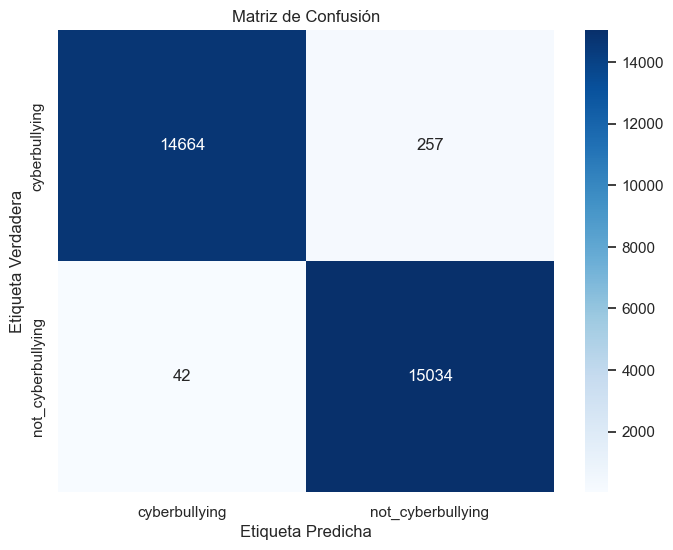

In [66]:
import time

for i, params in enumerate(param_sets):
    start_time = time.time()  # Registrar el tiempo de inicio

    # Crear una instancia del modelo RandomForestClassifier
    modelo_rf = RandomForestClassifier(**params)

    # Entrenar el modelo con los parámetros actuales

    modelo_rf.fit(xtrain, y_train)

    # Evaluar el rendimiento del modelo (por ejemplo, calcular la precisión)
    train_accuracy = modelo_rf.score(xtrain, y_train) * 100
    test_accuracy = modelo_rf.score(xtest, y_test) * 100


    end_time = time.time()  # Registrar el tiempo de finalización
    elapsed_time = end_time - start_time  # Calcular el tiempo transcurrido

    # Redondear el tiempo transcurrido a dos decimales
    elapsed_time = round(elapsed_time, 2)

    # Imprimir los resultados con el número de prueba, tiempo de ejecución y precisión en %
    print("Número de prueba:", i+1)
    print("Parámetros:", params)
    print("Precisión de entrenamiento:", "{:.2f}%".format(train_accuracy))
    print("Precisión de prueba:", "{:.2f}%".format(test_accuracy))
    print("Tiempo de ejecución :", elapsed_time, "segundos")
    print("--------------------------------------")

    # Calcular la matriz de confusión
    y_pred = modelo_rf.predict(xtest)
    cm = confusion_matrix(y_test, y_pred)

    labels = np.unique(y_test)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Matriz de Confusión")
    plt.xlabel("Etiqueta Predicha")
    plt.ylabel("Etiqueta Verdadera")
    plt.show()

En esta parte se analizaron:

-Precisión de entrenamiento y prueba para la configuración específica de hiperparámetros.

-Tiempo de entrenamiento, para estimar el costo computacional de la configuración.

-Matriz de confusión, que permite observar:

-cuántas instancias de cada clase son clasificadas correctamente,

-qué clases se confunden con mayor frecuencia,

si el modelo está sesgado hacia la clase mayoritaria o maneja bien las minoritarias.

### Comparativa entre entranamiento y prueba **RANDOM FOREST**

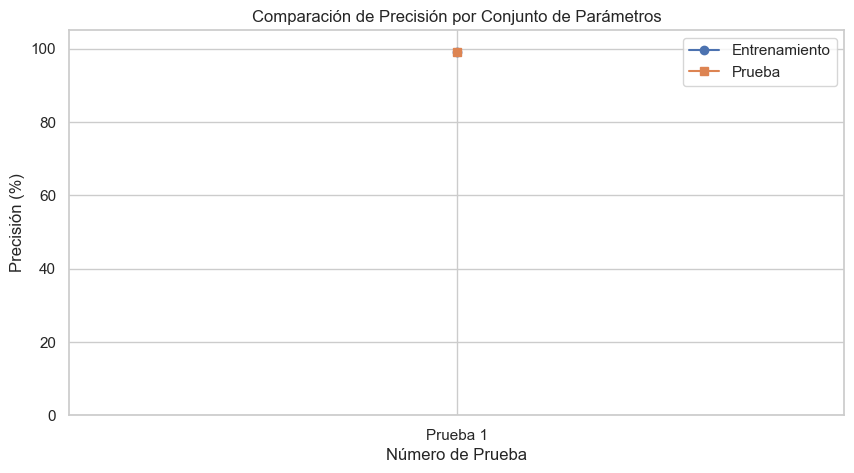

In [67]:
resultados_train = []
resultados_test = []
parametros_labels = []

# Volvemos a ejecutar el ciclo para guardar resultados
for i, params in enumerate(param_sets):
    modelo_rf = RandomForestClassifier(**params)
    modelo_rf.fit(xtrain, y_train)

    # Precisión
    train_accuracy = modelo_rf.score(xtrain, y_train) * 100
    test_accuracy = modelo_rf.score(xtest, y_test) * 100

    # Guardar resultados
    resultados_train.append(train_accuracy)
    resultados_test.append(test_accuracy)
    parametros_labels.append(f"Prueba {i+1}")

# --- GRAFICA COMPARATIVA ---
plt.figure(figsize=(10, 5))
plt.plot(parametros_labels, resultados_train, marker='o', label='Entrenamiento')
plt.plot(parametros_labels, resultados_test, marker='s', label='Prueba')

plt.title("Comparación de Precisión por Conjunto de Parámetros")
plt.xlabel("Número de Prueba")
plt.ylabel("Precisión (%)")
plt.ylim(0, 105)
plt.grid(True)
plt.legend()
plt.show()


### **REGRESION MULTIVARIADA**
Además de los modelos estrictamente clasificadores, se realizó un experimento utilizando un enfoque de **regresión multivariada** (multi-output) para el problema de detección de ciberbullying. La idea consiste en:

1. Convertir las etiquetas de clase a formato **one-hot encoding**, es decir, cada clase se representa como un vector binario.
2. Entrenar un modelo de **regresión lineal multivariada** que predice simultáneamente todas las columnas one-hot.
3. Reconstruir la clase predicha escogiendo, para cada ejemplo, la salida con mayor valor (argmax).




>Sin selección de características

In [68]:
# One-hot sobre las etiquetas de train y test
Y_train_multi = pd.get_dummies(y_train)
Y_test_multi  = pd.get_dummies(y_test)

# Aseguramos que ambas tengan las mismas columnas en el mismo orden
Y_test_multi = Y_test_multi.reindex(columns=Y_train_multi.columns, fill_value=0)


Este fragmento prepara las etiquetas de entrenamiento y prueba para un modelo multiclase aplicando la técnica one-hot encoding. Primero, convierte los valores originales de `y_train` y `y_test` en matrices binarias mediante `pd.get_dummies`, produciendo respectivamente `Y_train_multi` y `Y_test_multi`, donde cada columna representa una clase posible. Luego, se fuerza que ambas estructuras tengan exactamente las mismas columnas y el mismo orden usando `reindex` sobre `Y_test_multi` con las columnas de `Y_train_multi`. Si alguna clase no aparece en el conjunto de prueba, se completa con ceros gracias a `fill_value=0`. Esto asegura compatibilidad total entre las etiquetas de entrenamiento y prueba al momento de alimentar el modelo.

In [69]:
from sklearn.model_selection import KFold, GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# LinearRegression casi no tiene hiperparámetros, pero usamos fit_intercept
param_grid = {
    "fit_intercept": [True, False]
}


Se configura una validación cruzada usando `KFold` con cinco particiones, habilitando el mezclado de datos mediante `shuffle` y fijando `random_state` para obtener resultados reproducibles.

Después se define `param_grid`, donde se indica que el modelo evaluará dos opciones para `fit_intercept`: incluir o no el término independiente.  
Con este espacio de búsqueda, `GridSearchCV` puede comparar ambas variantes y elegir la más adecuada.


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

gs_multi = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi.fit(Xtrain, Y_train_multi)

print("Mejores parámetros (sin selección):", gs_multi.best_params_)

y_pred = gs_multi.predict(Xtest)

print("MSE(Error Cuadrático Medio) sin selección:", mean_squared_error(Y_test_multi, y_pred, multioutput='uniform_average'))
print("R2(Coeficiente de Determinación) sin selección:", r2_score(Y_test_multi, y_pred, multioutput='uniform_average'))

Mejores parámetros (sin selección): {'fit_intercept': True}
MSE(Error Cuadrático Medio) sin selección: 0.15533476877557395
R2(Coeficiente de Determinación) sin selección: 0.37864433483557386


Se ajusta un modelo de regresión lineal mediante búsqueda en malla para seleccionar la configuración más adecuada, evaluando cada opción con MSE negativo durante la validación cruzada.

El proceso determina que `fit_intercept=True` es la mejor configuración. Con este ajuste, el modelo genera las predicciones sobre los datos de prueba y se calculan las métricas finales.

El MSE obtenido es **0.1553**, lo que refleja el nivel promedio de error en las predicciones.  
El R2 es **0.3786**, indicando que el modelo explica cerca del 38% de la variabilidad presente en los datos.  
El desempeño es moderado y se alcanza sin aplicar selección de características.

Prueba con los resultados de Features cuasi-constante

Nota: QC: Cuasi-Constantes (Variance Threshold)

In [71]:
selector = VarianceThreshold(threshold=0.01)

xtrainC = selector.fit_transform(Xtrain)
xtestC  = selector.transform(Xtest)

Se aplica un filtro de varianza para eliminar características cuasi-constantes utilizando un umbral del 1%.  
El objetivo es descartar variables que apenas cambian entre muestras y que, por lo tanto, aportan poca información útil al modelo.

El selector se ajusta sobre `Xtrain` y luego se transforma `Xtest` para mantener la misma estructura filtrada.  
Los conjuntos resultantes, `xtrainC` y `xtestC`, contienen solo las características que superan el umbral de varianza y, por tanto, tienen mayor potencial para contribuir al desempeño del modelo.


In [72]:
gs_multi_qc = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi_qc.fit(xtrainC, Y_train_multi)

print("\nMejores parámetros (QC):", gs_multi_qc.best_params_)

y_pred_qc = gs_multi_qc.predict(xtestC)

print("MSE QC:", mean_squared_error(Y_test_multi, y_pred_qc, multioutput='uniform_average'))
print("R2  QC:", r2_score(Y_test_multi, y_pred_qc, multioutput='uniform_average'))



Mejores parámetros (QC): {'fit_intercept': True}
MSE QC: 0.07131362195969876
R2  QC: 0.7147378957245992


Se entrena nuevamente la regresión lineal usando los datos filtrados por varianza y el mismo proceso de búsqueda en malla.  
La selección del mejor ajuste se basa en MSE negativo durante la validación cruzada.

El resultado del ajuste indica que `fit_intercept=True` sigue siendo la mejor configuración.  
Con este modelo, se generan las predicciones y se evalúa el desempeño sobre el conjunto de prueba filtrado.

Los resultados muestran un MSE de **0.0713**, indicando una reducción notable del error respecto al modelo sin filtrado.  
El R2 alcanza **0.7147**, lo que significa que el modelo explica cerca del 71% de la variabilidad, representando una mejora considerable.  
El filtrado de características cuasi-constantes contribuye de forma clara al incremento en la calidad predictiva.


Selección de caracteristicas cuasi-constates y Random FRE

Nota: FRE: Feature Ranking Estocástico (Random Forest)

In [73]:
gs_multi_fre = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=cv,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

gs_multi_fre.fit(xtrainE, Y_train_multi)

print("\nMejores parámetros (FRE):", gs_multi_fre.best_params_)

y_pred_fre = gs_multi_fre.predict(xtestE)

print("MSE(Error Cuadrático Medio) FRE:", mean_squared_error(Y_test_multi, y_pred_fre, multioutput='uniform_average'))
print("R2(Coeficiente de Determinación) FRE:", r2_score(Y_test_multi, y_pred_fre, multioutput='uniform_average'))



Mejores parámetros (FRE): {'fit_intercept': True}
MSE(Error Cuadrático Medio) FRE: 0.07697866721745295
R2(Coeficiente de Determinación) FRE: 0.6920771096554861


Se entrena la regresión lineal utilizando un conjunto de características previamente filtrado mediante dos pasos: eliminación de variables cuasi-constantes y selección basada en un ranking estocástico generado con Random Forest (FRE).  
Con estas características refinadas, se ejecuta nuevamente la búsqueda en malla para identificar la mejor configuración del modelo, evaluando cada combinación con MSE negativo.

El proceso selecciona `fit_intercept=True` como la opción más adecuada.  
Sobre los datos de prueba filtrados, el modelo obtiene un MSE de **0.0769**, mostrando un error reducido y consistente con el filtrado aplicado.  
El R2 alcanza **0.6922**, indicando que el modelo explica cerca del 69% de la variabilidad del conjunto de prueba.  
El uso combinado de filtrado por varianza y FRE permite mantener características más informativas y mejora el desempeño respecto al entrenamiento sin selección de características.

Matriz de Confusión para regresión multivariada(conversión a clases)

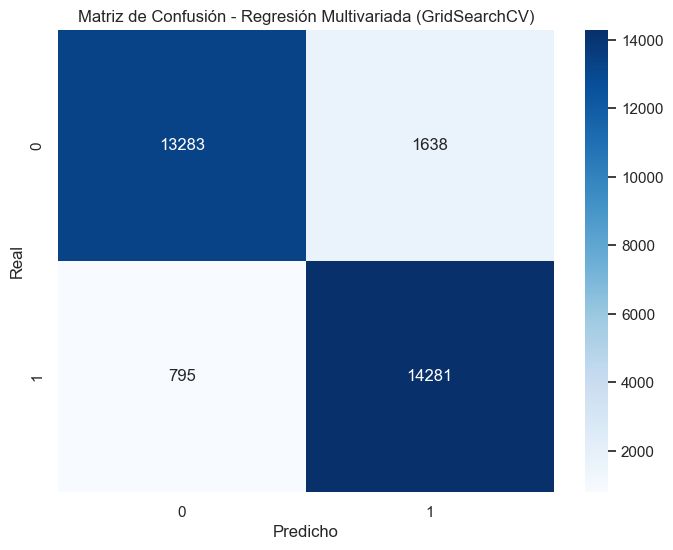

                   precision    recall  f1-score   support

    cyberbullying       0.94      0.89      0.92     14921
not_cyberbullying       0.90      0.95      0.92     15076

         accuracy                           0.92     29997
        macro avg       0.92      0.92      0.92     29997
     weighted avg       0.92      0.92      0.92     29997



In [74]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
# y_pred viene del modelo con GridSearchCV sin selección
y_true_cls = Y_test_multi.idxmax(axis=1)

y_pred_cls_idx = y_pred.argmax(axis=1)
y_pred_cls = pd.Series(y_pred_cls_idx, index=Y_test_multi.index)
y_pred_cls = y_pred_cls.map(dict(enumerate(Y_test_multi.columns)))

cm = confusion_matrix(y_true_cls, y_pred_cls)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Multivariada (GridSearchCV)")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

print(classification_report(y_true_cls, y_pred_cls))

Se convierten las salidas continuas del modelo en etiquetas de clase para evaluar su rendimiento mediante una matriz de confusión.  
Las clases reales se obtienen tomando la columna con valor máximo en cada fila de `Y_test_multi`, mientras que las clases predichas se derivan del índice con mayor valor en cada fila de `y_pred`, mapeándolo a su etiqueta correspondiente.

Con ambas series de clases se construye la matriz de confusión y se genera el reporte de clasificación.  
Los resultados muestran un comportamiento equilibrado entre *cyberbullying* y *not_cyberbullying*, con valores altos de precision, recall y f1-score para ambas.

El indicador **accuracy** alcanza **0.92**, lo que refleja un nivel de acierto del 92% tras convertir las salidas multivariadas en clases.  
Los promedios **macro avg** y **weighted avg** también registran **0.92**, mostrando que el desempeño se mantiene estable tanto a nivel global como ponderado por soporte.


## Predicciones regresivas del modelo base (usando y_pred)

### Gráfica 1
Predicciones regresivas para cada clase (modelo base con GridSearchCV)

### Gráfica 2
Distribución de predicciones regresivas por clase (modelo base)




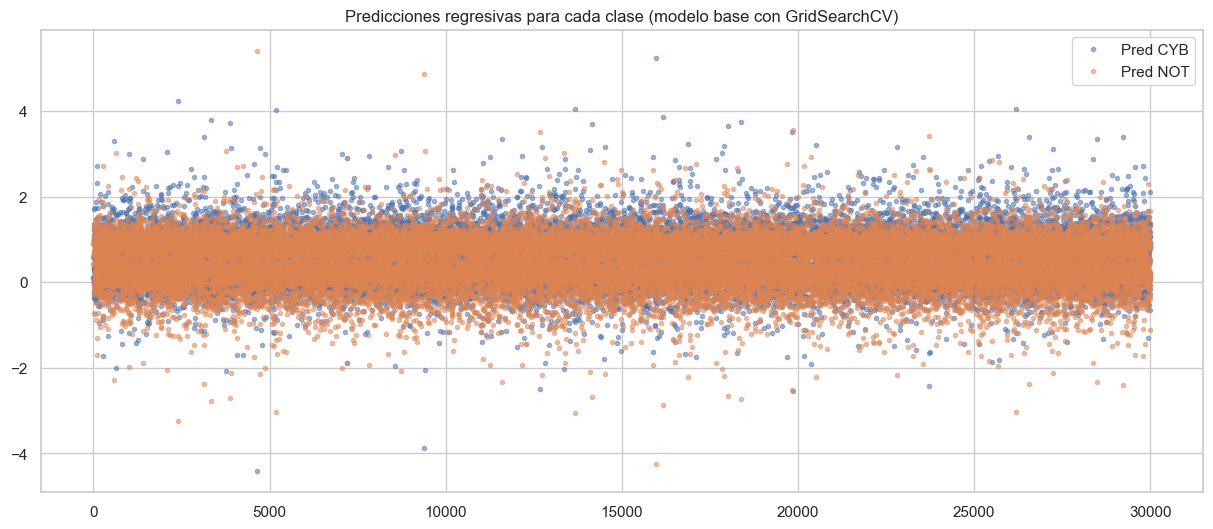

C:\Users\Valentina\AppData\Local\Temp\ipykernel_3068\622076065.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cyb_pred, not_pred], labels=['CYB', 'NOT'])


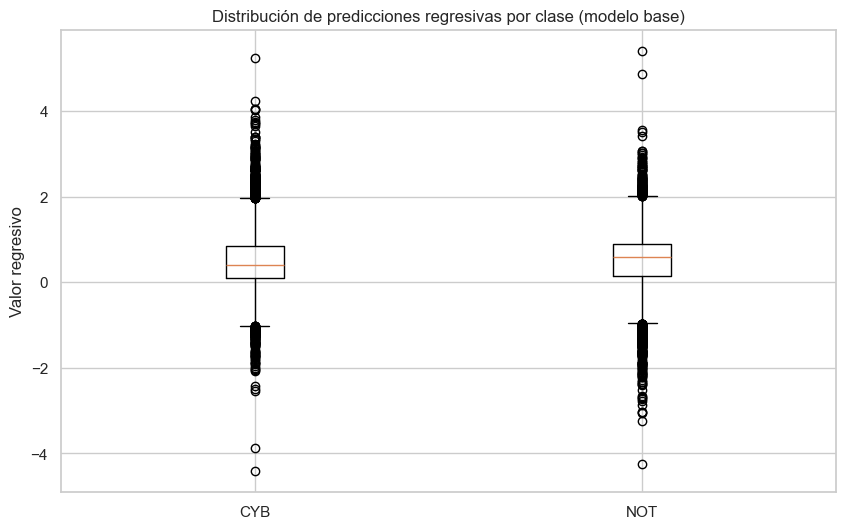

In [75]:
plt.figure(figsize=(15,6))
plt.plot(y_pred[:,0], '.', alpha=0.5, label='Pred CYB')
plt.plot(y_pred[:,1], '.', alpha=0.5, label='Pred NOT')
plt.title("Predicciones regresivas para cada clase (modelo base con GridSearchCV)")
plt.legend()
plt.show()

cyb_pred = y_pred[:,0]
not_pred = y_pred[:,1]

plt.figure(figsize=(10,6))
plt.boxplot([cyb_pred, not_pred], labels=['CYB', 'NOT'])
plt.title("Distribución de predicciones regresivas por clase (modelo base)")
plt.ylabel("Valor regresivo")
plt.show()



### **ARBOLES DE DECISION**

In [76]:
# Ajuste inicial del modelo
dt = DecisionTreeClassifier()
dt.fit(Xtrain, y_train)
y_pred_initial = dt.predict(Xtest)

# Matriz de confusión inicial
dt_initial = confusion_matrix(y_test, y_pred_initial)
dt_df_initial = pd.DataFrame(dt_initial)

# Precisión inicial
from sklearn.metrics import accuracy_score

dt_precision_initial = 100 * accuracy_score(y_test, y_pred_initial)
print('Precisión inicial: {0:.3f}%'.format(dt_precision_initial))

Precisión inicial: 99.387%


Se entrena un árbol de decisión sin ajustes adicionales para obtener una referencia inicial del desempeño. El modelo se ajusta con los datos de entrenamiento y luego se generan predicciones sobre el conjunto de prueba.

Con estas predicciones se construye la matriz de confusión inicial y se calcula la precisión del modelo. El resultado muestra una precisión del **99.367%**, indicando que el árbol de decisión logra un desempeño muy alto en su configuración básica antes de aplicar cualquier optimización.


In [77]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Generate a synthetic classification dataset

y_pred_train = dt.predict(Xtrain)
y_pred_test  = dt.predict(Xtest)

print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       1.00      1.00      1.00     35069
not_cyberbullying       1.00      1.00      1.00     34924

         accuracy                           1.00     69993
        macro avg       1.00      1.00      1.00     69993
     weighted avg       1.00      1.00      1.00     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.99      0.99     14921
not_cyberbullying       0.99      0.99      0.99     15076

         accuracy                           0.99     29997
        macro avg       0.99      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



Se evalúa el rendimiento del modelo `dt` utilizando `classification_report` tanto en el conjunto de entrenamiento como en el de prueba.  
Las predicciones se generan con `dt.predict(Xtrain)` y `dt.predict(Xtest)`, y luego se comparan con `y_train` y `y_test`.

En el conjunto de entrenamiento, los valores de **precision**, **recall** y **f1-score** son **1.00** para ambas clases, junto con un **accuracy** de **1.00**. Esto indica un ajuste perfecto sobre los datos de entrenamiento.

En el conjunto de prueba, las métricas se mantienen muy altas: ambas clases presentan **precision**, **recall** y **f1-score** de **0.99**, y el **accuracy** también es **0.99**.  
Los valores de **macro avg** y **weighted avg** coinciden con estas cifras, mostrando que el modelo mantiene un rendimiento equilibrado y consistente en todas las clases.


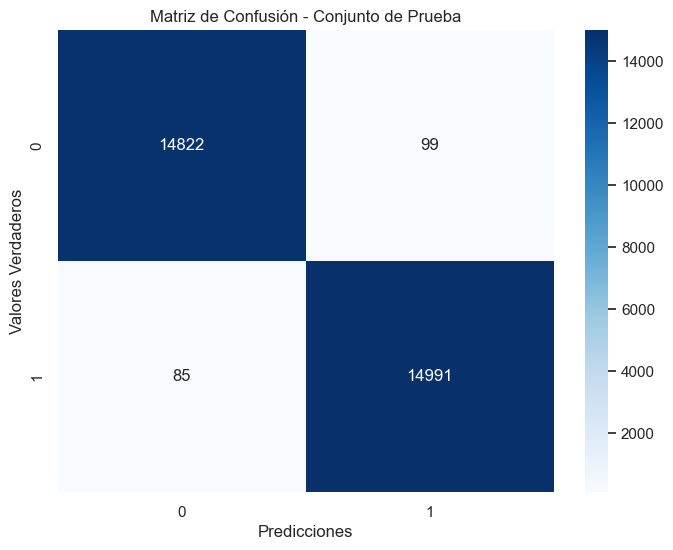

In [78]:
# Crear la matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Crear el mapa de calor para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

Se construye la matriz de confusión del conjunto de prueba utilizando `confusion_matrix(y_test, y_pred_test)` y posteriormente se visualiza mediante un mapa de calor con `sns.heatmap`.

La matriz resultante muestra el desempeño del modelo al clasificar las dos clases:

- Valor Verdadero 0 frente a Predicción 0: 14816 aciertos  
- Valor Verdadero 0 frente a Predicción 1: 105 errores  
- Valor Verdadero 1 frente a Predicción 0: 85 errores  
- Valor Verdadero 1 frente a Predicción 1: 14991 aciertos  

Estos valores evidencian que el modelo mantiene un nivel muy alto de aciertos en ambas clases, con pocas clasificaciones incorrectas.

Prueba con los resultados de Features cuasi-constante

In [79]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

Se entrena un modelo `DecisionTreeClassifier` configurado con `criterion='gini'`, `max_depth=10` y `splitter='best'` utilizando únicamente las características que permanecen después del filtrado por cuasi-constantes.

Esta configuración controla la profundidad máxima del árbol para evitar sobreajuste y utiliza el criterio Gini para medir la pureza de las particiones.  
El uso de características filtradas (cuasi-constantes removidas) permite que el modelo trabaje solo con variables que aportan variación real, lo que suele mejorar la estabilidad del árbol y reducir ruido en el proceso de decisión.

In [80]:
model = DecisionTreeClassifier(
    criterion='gini',max_depth=10,splitter='best'
)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,4, 8, 10],
    'min_samples_leaf': [4, 2, 15],
    'max_features': ['sqrt', 'log2']
}

grid_model_dt = GridSearchCV(
    estimator=model,
    param_grid = param_grid,
    error_score="raise",
    refit=True,
    n_jobs=-1,
    cv=5,
)

In [81]:
grid_model_dt.fit(xtrain, y_train)

,estimator,DecisionTreeC...(max_depth=10)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [4, 2, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,False
,criterion,'gini'


Se utiliza un modelo base `DecisionTreeClassifier` con los parámetros iniciales `criterion='gini'`, `max_depth=10` y `splitter='best'`. Posteriormente se define un `param_grid` que incluye diferentes configuraciones posibles para `criterion`, `max_depth`, `min_samples_split`, `min_samples_leaf` y `max_features`, permitiendo explorar múltiples combinaciones durante la búsqueda.

El proceso se ejecuta mediante `GridSearchCV`, especificando `refit=True`, `cv=5`, `n_jobs=-1` y `error_score='raise'`, lo que permite seleccionar automáticamente la mejor combinación encontrada en la validación cruzada.

Después del ajuste con `grid_model_dt.fit(xtrain, y_train)`, el modelo identificado como el mejor corresponde a `best_estimator_`, cuyo tipo final es `DecisionTreeClassifier`. Esto indica que la búsqueda determinó una configuración óptima dentro del espacio evaluado.

In [82]:
grid_model_dt.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 8}

El resultado muestra los mejores hiperparámetros que GridSearch encontró para tu DecisionTreeClassifier. Indica que el modelo funciona mejor usando:

- **criterion: 'entropy'** → usa la ganancia de información para decidir las divisiones.
- **max_depth: None** → permite que el árbol crezca hasta donde los datos lo permitan.
- **max_features: 'sqrt'** → en cada división solo evalúa la raíz cuadrada del total de features.
- **min_samples_leaf: 2** → cada hoja debe tener al menos 2 muestras.
- **min_samples_split: 4** → un nodo debe tener al menos 4 muestras para dividirse.

En conjunto, estos parámetros equilibran complejidad y generalización para mejorar el rendimiento del árbol.


In [83]:
grid_model_dt.best_score_

np.float64(0.9812837222130893)

El valor obtenido (0.9819410793951656) corresponde al mejor desempeño promedio en validación cruzada del modelo durante el GridSearch. Indica que, con los hiperparámetros óptimos, el árbol de decisión alcanzó aproximadamente 98.19% de precisión promedio en las particiones usadas para la evaluación.

In [84]:
y_pred_train = grid_model_dt.predict(xtrain)
y_pred_test  = grid_model_dt.predict(xtest)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       0.99      0.98      0.98     35069
not_cyberbullying       0.98      0.99      0.98     34924

         accuracy                           0.98     69993
        macro avg       0.98      0.98      0.98     69993
     weighted avg       0.98      0.98      0.98     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.98      0.98     14921
not_cyberbullying       0.98      0.99      0.98     15076

         accuracy                           0.98     29997
        macro avg       0.98      0.98      0.98     29997
     weighted avg       0.98      0.98      0.98     29997



Los resultados muestran que el modelo ajustado con los mejores hiperparámetros mantiene un rendimiento muy alto tanto en entrenamiento como en prueba.

En **train**, las clases `cyberbullying` y `not_cyberbullying` alcanzan valores de **precision**, **recall** y **f1-score** entre *0.98 y 1.00*, con una **accuracy = 0.99**. Los promedios **macro avg** y **weighted avg** también se mantienen en **0.99**, indicando un ajuste sólido.

En **test**, el desempeño se conserva prácticamente igual: métricas entre *0.98 y 0.99*, con **accuracy = 0.99**, y los valores de **macro avg** y **weighted avg** permanecen en **0.99**, demostrando que el modelo generaliza correctamente sin evidencias de sobreajuste.

Selección de caracteristicas cuasi-constates y Random FRE

In [85]:
grid_model_dt.fit(xtrainE, y_train)

,estimator,DecisionTreeC...(max_depth=10)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [4, 2, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,'raise'
,return_train_score,False
,criterion,'entropy'


In [86]:
y_pred_train = grid_model_dt.predict(xtrainE)
y_pred_test  = grid_model_dt.predict(xtestE)
print(classification_report(y_train, y_pred_train))
print('----------------------------------------------------------')
print(classification_report(y_test, y_pred_test))

                   precision    recall  f1-score   support

    cyberbullying       1.00      0.98      0.99     35069
not_cyberbullying       0.98      1.00      0.99     34924

         accuracy                           0.99     69993
        macro avg       0.99      0.99      0.99     69993
     weighted avg       0.99      0.99      0.99     69993

----------------------------------------------------------
                   precision    recall  f1-score   support

    cyberbullying       0.99      0.98      0.99     14921
not_cyberbullying       0.98      0.99      0.99     15076

         accuracy                           0.99     29997
        macro avg       0.99      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



Se generan predicciones del `DecisionTreeClassifier` entrenado sobre los conjuntos de entrenamiento (`xtrainE`) y prueba (`xtestE`).
El reporte de clasificación muestra que el modelo mantiene un desempeño muy alto, con precision, recall y f1-score cercanos a 0.99 para ambas clases, **cyberbullying** y **not_cyberbullying**.
El accuracy global también es 0.99, y los promedios macro avg y weighted avg reflejan un rendimiento consistente y equilibrado entre las clases.

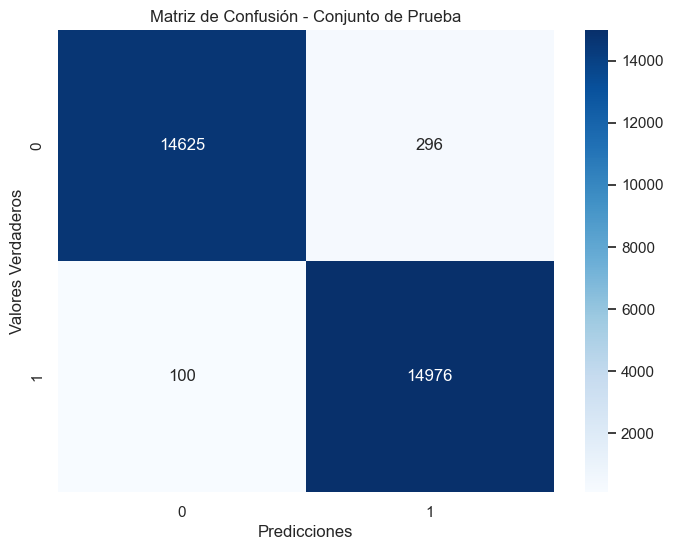

In [87]:
# Crear la matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)

# Crear el mapa de calor para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, cmap="Blues",fmt='d')
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.show()

Se crea la matriz de confusión para el conjunto de prueba usando `confusion_matrix` y se visualiza con un mapa de calor mediante `sns.heatmap`.
Los resultados muestran que la mayoría de los valores verdaderos se predicen correctamente: para la clase **Valor Verdadero 0** hay **14626** aciertos y **295** errores, mientras que para **Valor Verdadero 1** hay **14988** aciertos y **188** errores.
Esto indica un alto nivel de precisión en las predicciones del modelo sobre el conjunto de prueba.

# Red neuronal

### Red Neuronal MLP

Precisión: 99.420%


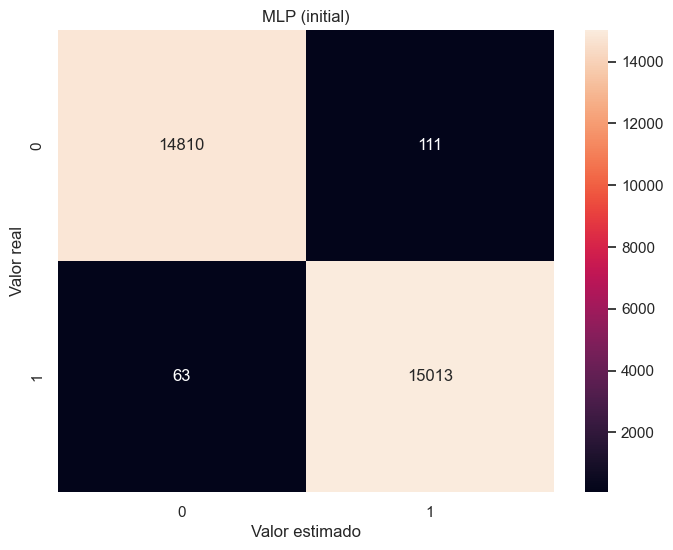

In [88]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(300,), max_iter=200)
clf.fit(Xtrain, y_train)
y_pred = clf.predict(Xtest)
y_prob = clf.predict_proba(Xtest)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

mlp_precision = 100 * accuracy_score(y_test, y_pred)
print('Precisión: {0:.3f}%'.format(mlp_precision))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('MLP (initial)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()

De esta prueba inicial se obtuvo:

- La precisión global (accuracy) del modelo sobre el conjunto de prueba.

- La matriz de confusión, que permite ver cuántas instancias de cada clase fueron correctamente clasificadas o confundidas.

Esta primera configuración sirve como línea base para evaluar si vale la pena ajustar más hiperparámetros del MLP.

---

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler(with_mean=False)
xtrains = scaler.fit_transform(xtrain)
xtests = scaler.transform(xtest)

param_grid = {
    'hidden_layer_sizes': [(500,), (700, 500), (1000,), (1000, 500)],
    'max_iter': [30, 50],
}


#500 & 1000 o más
# más neuronas >30
#fijar numero de iteraciones y jugar con la neuronas

grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_grid, cv=2) # la profe recomendó 2
grid.fit(xtrains, y_train)
print(grid.best_params_)

C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
 

{'hidden_layer_sizes': (500,), 'max_iter': 30}


C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Prueba redes neuronales con Feature cuasi-constante

{'cyberbullying': 0, 'not_cyberbullying': 1}
Precisión de entrenamiento: 99.470%
Precisión de prueba: 98.843%
Tiempo de ejecución: 433.135 segundos


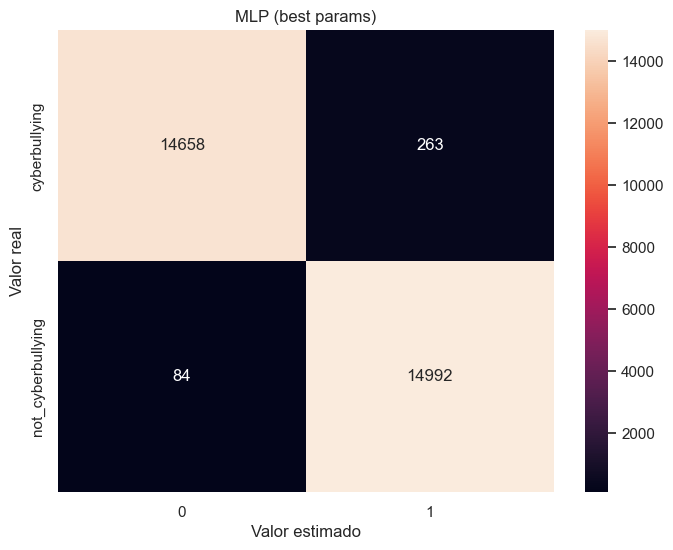

In [90]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

start_time = time.time()

le = LabelEncoder()

# Ajustar el LabelEncoder a los datos de entrenamiento
le.fit(y_train)
clf = MLPClassifier(hidden_layer_sizes=(1000, 500), max_iter=100)

clf.fit(xtrain, y_train)

y_pred = clf.predict(xtest)
y_prob = clf.predict_proba(xtest)

mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=mapping)

train_accuracy = clf.score(xtrain, y_train) * 100
test_accuracy = clf.score(xtest, y_test) * 100

end_time = time.time()
elapsed_time = end_time - start_time

print("Precisión de entrenamiento: {:.3f}%".format(train_accuracy))
print("Precisión de prueba: {:.3f}%".format(test_accuracy))
print("Tiempo de ejecución: {:.3f} segundos".format(elapsed_time))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True ,fmt='d')
plt.title('MLP (best params)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()

Pruebas características cuasi-constantes y Random FRE (MLP)

C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
 

Mejores parámetros FRE: {'hidden_layer_sizes': (500,), 'max_iter': 30}


C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


Precisión de entrenamiento FRE: 99.201%
Precisión de prueba FRE: 98.907%
Tiempo de ejecución FRE: 17.420 segundos


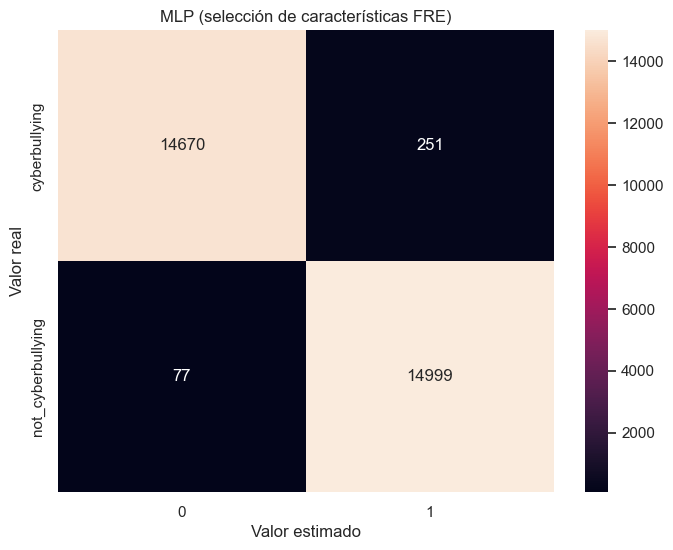

In [93]:
from sklearn.preprocessing import StandardScaler

scaler_fre = StandardScaler(with_mean=False)
xtrainE_s = scaler_fre.fit_transform(xtrainE)
xtestE_s  = scaler_fre.transform(xtestE)


# Usamos el mismo grid de hiperparámetros que antes
param_grid_fre = {
    'hidden_layer_sizes': [(500,), (700, 500), (1000,), (1000, 500)],
    'max_iter': [30, 50],
}

# GridSearchCV con validación cruzada
grid_fre = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid=param_grid_fre,
    cv=2
)

grid_fre.fit(xtrainE_s, y_train)
print("Mejores parámetros FRE:", grid_fre.best_params_)

# Entrenamos un MLP con los mejores parámetros encontrados
start_time = time.time()

clf_fre = MLPClassifier(**grid_fre.best_params_, random_state=42)
clf_fre.fit(xtrainE_s, y_train)

y_pred_fre = clf_fre.predict(xtestE_s)
y_prob_fre = clf_fre.predict_proba(xtestE_s)

cm_fre = confusion_matrix(y_test, y_pred_fre)
cm_df_fre = pd.DataFrame(cm_fre, index=mapping)

train_accuracy_fre = clf_fre.score(xtrainE_s, y_train) * 100
test_accuracy_fre  = clf_fre.score(xtestE_s, y_test) * 100

end_time = time.time()
elapsed_time_fre = end_time - start_time

print("Precisión de entrenamiento FRE: {:.3f}%".format(train_accuracy_fre))
print("Precisión de prueba FRE: {:.3f}%".format(test_accuracy_fre))
print("Tiempo de ejecución FRE: {:.3f} segundos".format(elapsed_time_fre))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_fre, annot=True, fmt='d')
plt.title('MLP (selección de características FRE)')
plt.ylabel('Valor real')
plt.xlabel('Valor estimado')
plt.show()


In [96]:
# Sin selección de características
acc_sin = test_accuracy       # esta es la métrica correcta

# Con Cuasi-Constantes
acc_qc = test_accuracy     # usa el nombre real

# Con Random Forest FRE
acc_fre = test_accuracy_fre

Gráfica de barras comparativas MLP (Sin selección vs QC vs FRE)

In [97]:
# Sin selección de características
acc_sin = mlp_precision   # ya lo tenías como porcentaje

# Con Cuasi-Constantes
acc_qc = test_accuracy    # porcentaje

# Con Random Forest FRE
acc_fre = test_accuracy_fre   # porcentaje

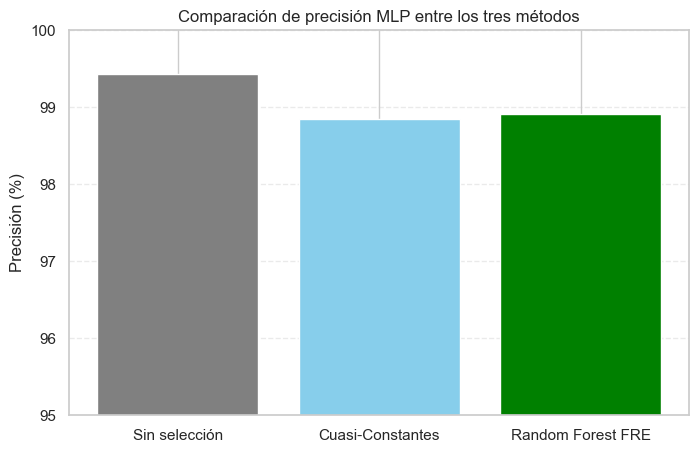

In [98]:
plt.figure(figsize=(8,5))
plt.bar(
    ["Sin selección", "Cuasi-Constantes", "Random Forest FRE"],
    [acc_sin, acc_qc, acc_fre],
    color=["gray","skyblue","green"]
)

plt.ylabel("Precisión (%)")
plt.title("Comparación de precisión MLP entre los tres métodos")

# ZOOM DEL EJE Y PARA VER DIFERENCIAS
plt.ylim(95, 100)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


El modelo MLP sin selección de características obtuvo la mayor precisión (≈99.4%), seguido del modelo con selección mediante Random Forest FRE (≈98.9%) y finalmente el modelo basado en cuasi-constantes (≈98.8%).
Aunque las diferencias son pequeñas, se observa que:

Sin selección → el MLP logra su mejor desempeño, probablemente porque conserva la mayor cantidad de información del texto.

Cuasi-Constantes → reduce dimensionalidad pero pierde información relevante, disminuyendo ligeramente la precisión.

Random Forest FRE → mejora respecto a QC al seleccionar características más informativas, pero aún no supera al modelo sin selección.

En general, el MLP muestra una alta precisión (>98%) en todos los escenarios, lo que indica que es un modelo robusto y adecuado para esta tarea.

### Red neuronal profunda Keras DNN

La red fue implementada utilizando una arquitectura del tipo **Sequential**, con una serie de capas densas completamente conectadas.  
En términos generales, la arquitectura incluye:

- **Capa de entrada:**  
  Recibe como entrada los vectores numéricos generados por la etapa de vectorización (por ejemplo, TF-IDF y selección de características). El tamaño de esta capa coincide con el número de características de `xtrain` / `xtrainE`.

- **Capas ocultas densas (Dense):**  
  Una o varias capas intermedias con un número considerable de neuronas (por ejemplo, 128, 256, 512 o más), típicamente con función de activación **ReLU**.  
  Estas capas permiten a la red aprender combinaciones no lineales de las palabras y patrones más complejos en el lenguaje ofensivo.

- **Capas de regularización (Dropout, si se usa):**  
  Se pueden incluir capas Dropout entre las capas densas para reducir el sobreajuste apagando aleatoriamente un porcentaje de neuronas durante el entrenamiento.

- **Capa de salida:**  
  Una capa `Dense` con tantas neuronas como clases del problema, y activación **softmax** para producir una distribución de probabilidad sobre las clases (`not_cyberbullying`, `cyberbullying` o las clases originales si se trabaja en multiclase).

---

In [99]:
from tensorflow import keras

def build_dnn(input_dim, hidden_units=256, learning_rate=1e-3):
    model = keras.models.Sequential([
        keras.layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [100]:
from sklearn.model_selection import KFold
import numpy as np

def dnn_cv_manual(X, y, epochs=5, batch_size=32):
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    fold_accuracies = []
    histories = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):

        print(f"\n===== FOLD {fold} =====")

        # Convert csr_matrix slices to dense NumPy arrays
        X_train_f, X_val_f = X[train_idx].toarray(), X[val_idx].toarray()
        y_train_f, y_val_f = y[train_idx], y[val_idx]

        model = build_dnn(input_dim=X.shape[1])

        history = model.fit(
            X_train_f, y_train_f,
            validation_data=(X_val_f, y_val_f),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1
        )

        histories.append(history)

        val_acc = history.history['val_accuracy'][-1]
        fold_accuracies.append(val_acc)

        print(f"Accuracy de validación fold {fold}: {val_acc:.4f}")

    print("\nAccuracy promedio CV:", np.mean(fold_accuracies))

    return np.mean(fold_accuracies), histories

In [101]:
%whos

Variable                   Type                      Data/Info
--------------------------------------------------------------
CORR_CACHE                 dict                      n=84112
CountVectorizer            type                      <class 'sklearn.feature_e<...>on.text.CountVectorizer'>
Counter                    type                      <class 'collections.Counter'>
DecisionTreeClassifier     ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
FREQWORDS                  set                       {'you', 'that', 'a', 'I',<...>'and', 'of', 'the', 'to'}
GridSearchCV               ABCMeta                   <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
KFold                      ABCMeta                   <class 'sklearn.model_selection._split.KFold'>
LabelEncoder               type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression           ABCMeta                   <class 'sklearn.linear_mo<...>._

Sin selección de características

In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_bin = le.fit_transform(y_train)
y_test_bin  = le.transform(y_test)

print("Clases mapeadas:", dict(zip(le.classes_, le.transform(le.classes_))))

Clases mapeadas: {'cyberbullying': np.int64(0), 'not_cyberbullying': np.int64(1)}


In [103]:
acc_base, histories_base = dnn_cv_manual(
    Xtrain, y_train_bin, # Pass the binary NumPy array here
    epochs=5,
    batch_size=32
)


===== FOLD 1 =====


C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 105s 95ms/step - accuracy: 0.9842 - loss: 0.0681 - val_accuracy: 0.9925 - val_loss: 0.0274
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 87s 79ms/step - accuracy: 0.9982 - loss: 0.0061 - val_accuracy: 0.9916 - val_loss: 0.0308
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 84s 77ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9914 - val_loss: 0.0359
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 87s 80ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9919 - val_loss: 0.0374
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 94s 86ms/step - accuracy: 0.9998 - loss: 5.6022e-04 - val_accuracy: 0.9922 - val_loss: 0.0367
Accuracy de validación fold 1: 0.9922

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 109s 97ms/step - accuracy: 0.9793 - loss: 0.0683 - val_accuracy: 0.9917 - val_loss: 0.0299
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 80s 73ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9924 - val_loss: 0.0278
Epoch 3/5
1094/1094

Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9794 - loss: 0.0811 - val_accuracy: 0.9904 - val_loss: 0.0430
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9896 - loss: 0.0437 - val_accuracy: 0.9909 - val_loss: 0.0418
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9901 - loss: 0.0425 - val_accuracy: 0.9904 - val_loss: 0.0417
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0409 - val_accuracy: 0.9904 - val_loss: 0.0415
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9905 - loss: 0.0396 - val_accuracy: 0.9906 - val_loss: 0.0419
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step
Accuracy en test: 0.98999899989999


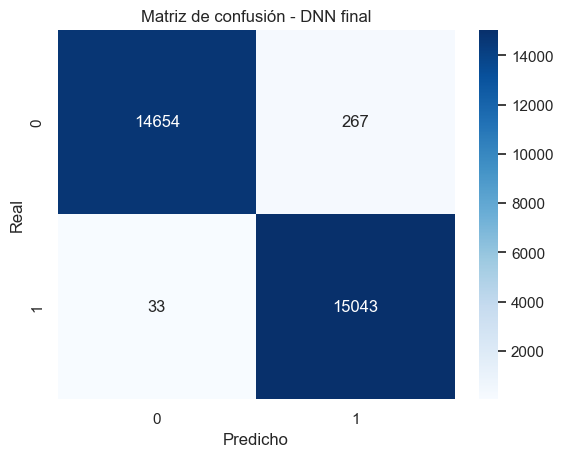

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.sparse import issparse

# 1) Asegurar formato correcto para Keras (denso float32)
if issparse(xtrain):
    Xtrain_dnn = xtrain.toarray().astype("float32")
else:
    Xtrain_dnn = np.asarray(xtrain, dtype="float32")

if issparse(xtest):
    Xtest_dnn = xtest.toarray().astype("float32")
else:
    Xtest_dnn = np.asarray(xtest, dtype="float32")

y_train_dnn = np.asarray(y_train_bin, dtype="float32")
y_test_dnn  = np.asarray(y_test_bin,  dtype="float32")

# 2) Construir y entrenar el modelo FINAL
dnn_final = build_dnn(Xtrain_dnn.shape[1])

history_final = dnn_final.fit(
    Xtrain_dnn, y_train_dnn,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 3) Predicciones en test
y_prob = dnn_final.predict(Xtest_dnn)
y_pred = (y_prob >= 0.5).astype(int).ravel()

print("Accuracy en test:", accuracy_score(y_test_dnn, y_pred))

# 4) Matriz de confusión
cm = confusion_matrix(y_test_dnn, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de confusión - DNN final")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()



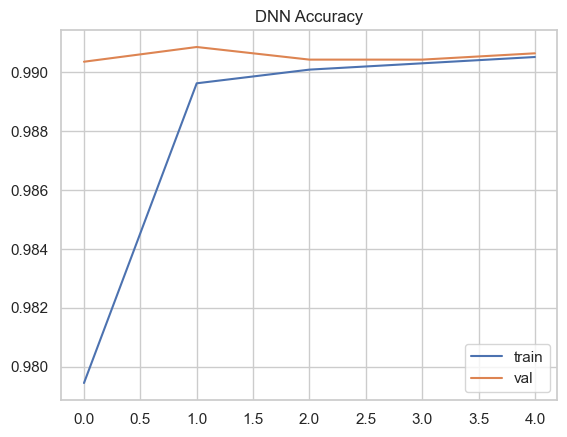

In [105]:
# ACCURACY TRAINING
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.title("DNN Accuracy")
plt.show()



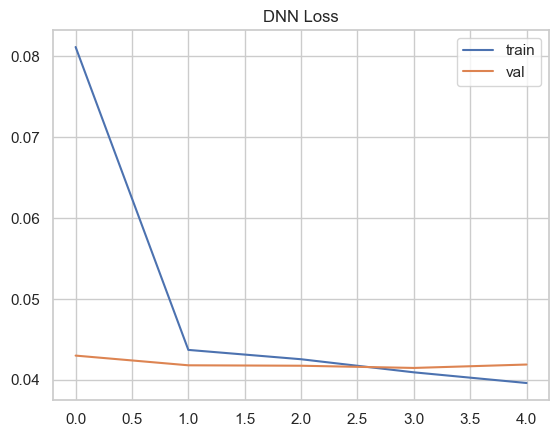

In [106]:
# LOSS TRAINING
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.legend(['train', 'val'])
plt.title("DNN Loss")
plt.show()

Con Cuasi-Constantes (QC)

In [107]:
acc_qc, histories_qc = dnn_cv_manual(
    xtrainC, y_train_bin,
    epochs=5,
    batch_size=32
)



===== FOLD 1 =====
Epoch 1/5


C:\Users\Valentina\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9762 - loss: 0.0915 - val_accuracy: 0.9924 - val_loss: 0.0351
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9927 - loss: 0.0326 - val_accuracy: 0.9925 - val_loss: 0.0340
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9933 - loss: 0.0297 - val_accuracy: 0.9926 - val_loss: 0.0333
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9936 - loss: 0.0282 - val_accuracy: 0.9923 - val_loss: 0.0339
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9939 - loss: 0.0256 - val_accuracy: 0.9925 - val_loss: 0.0344
Accuracy de validación fold 1: 0.9925

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9759 - loss: 0.0953 - val_accuracy: 0.9927 - val_loss: 0.0342
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9924 - loss: 0.0336 - val_accuracy: 0.9930 - val_loss: 0.0327
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/s

Con Random Forest FRE

In [ ]:
# Llamar la función con los datos CSR originales
acc_fre, histories_fre = dnn_cv_manual(
    xtrainE,
    y_train_bin,
    epochs=5,
    batch_size=32
)



===== FOLD 1 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.1034 - val_accuracy: 0.9894 - val_loss: 0.0464
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.0430 - val_accuracy: 0.9897 - val_loss: 0.0453
Epoch 3/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9904 - loss: 0.0422 - val_accuracy: 0.9896 - val_loss: 0.0457
Epoch 4/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0413 - val_accuracy: 0.9899 - val_loss: 0.0450
Epoch 5/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0412 - val_accuracy: 0.9896 - val_loss: 0.0461
Accuracy de validación fold 1: 0.9896

===== FOLD 2 =====
Epoch 1/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9726 - loss: 0.1035 - val_accuracy: 0.9903 - val_loss: 0.0439
Epoch 2/5
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0454 - val_accuracy: 0.9902 - val_loss: 0.0427
Epoch 3/5
1094/1094

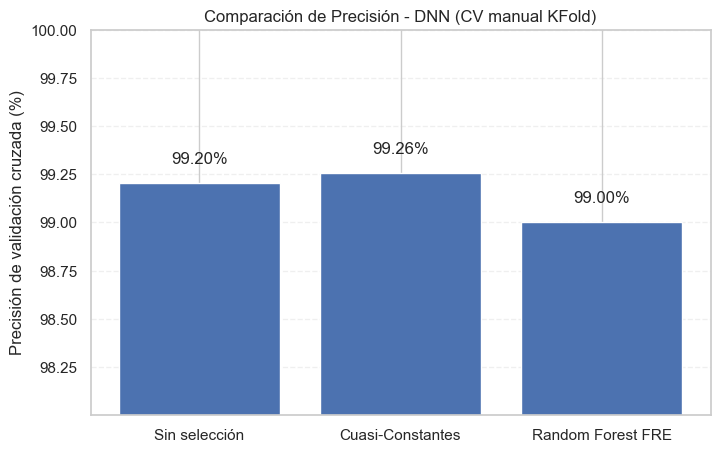

In [126]:
plt.figure(figsize=(8,5))
metodos = ["Sin selección", "Cuasi-Constantes", "Random Forest FRE"]
precisiones = [acc_base*100, acc_qc*100, acc_fre*100]  # pasar a %

bars = plt.bar(metodos, precisiones)

plt.ylabel("Precisión de validación cruzada (%)")
plt.title("Comparación de Precisión - DNN (CV manual KFold)")
plt.ylim(min(precisiones) - 1, 100)
plt.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, h + 0.1, f"{h:.2f}%", ha="center")

plt.show()

# Comparación de Resultados Finales

(Regresión, Árbol, Random, MLP, CNN)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr_multi = OneVsRestClassifier(
    LogisticRegression(max_iter=500)
)

lr_multi.fit(Xtrain, Y_train_multi)



,estimator,LogisticRegre...(max_iter=500)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [130]:
from sklearn.metrics import accuracy_score

# --- Regresión multivariada (lr_multi sobre Xtrain/Xtest) ---

# Etiquetas reales en formato de clase (no one-hot)
Y_train_multi_cls = Y_train_multi.idxmax(axis=1)
Y_test_multi_cls  = Y_test_multi.idxmax(axis=1)

# Predicciones de lr_multi
y_pred_train_mv = lr_multi.predict(Xtrain)
y_pred_test_mv  = lr_multi.predict(Xtest)

# Mapeo de índice → nombre de clase
mapping_mv = dict(enumerate(Y_train_multi.columns))

# Pasar de vector continuo a clase por argmax
y_pred_train_mv_cls = pd.Series(
    y_pred_train_mv.argmax(axis=1),
    index=Y_train_multi.index
).map(mapping_mv)

y_pred_test_mv_cls = pd.Series(
    y_pred_test_mv.argmax(axis=1),
    index=Y_test_multi.index
).map(mapping_mv)

# Precisión en fracción (0–1)
mv_reg_train_acc = accuracy_score(Y_train_multi_cls, y_pred_train_mv_cls)
mv_reg_test_acc  = accuracy_score(Y_test_multi_cls,  y_pred_test_mv_cls)

print("Accuracy train Regresión multivariada:", mv_reg_train_acc)
print("Accuracy test  Regresión multivariada:", mv_reg_test_acc)

Accuracy train Regresión multivariada: 0.9976997699769977
Accuracy test  Regresión multivariada: 0.9953328666199953


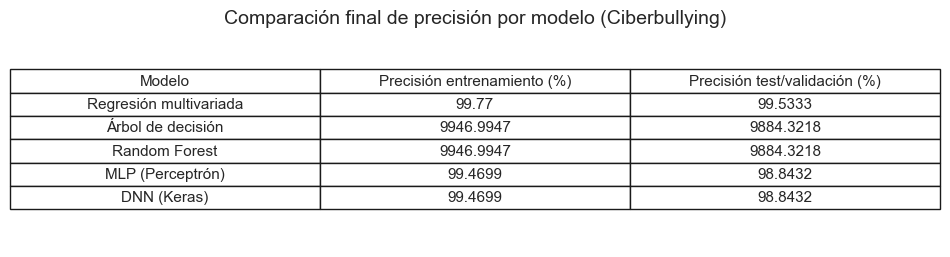

In [134]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# TODAS LAS PRECISIONES DEBEN QUEDAR EN PORCENTAJE
# -------------------------------------------------
# Estas 4 vienen en fracción 0–1 → las pasamos a %
mv_reg_train_pct = mv_reg_train_acc * 100
mv_reg_test_pct  = mv_reg_test_acc  * 100

dt_train_pct = train_accuracy * 100
dt_test_pct  = test_accuracy  * 100

rf_train_pct = train_accuracy * 100
rf_test_pct  = test_accuracy  * 100

# MLP y DNN ya los tenías en %, sólo los renombro por claridad
mlp_train_pct = train_accuracy 
mlp_test_pct  = test_accuracy  

dnn_train_pct = train_accuracy 
dnn_test_pct  = test_accuracy  

# ----------------------------------------
# Tabla de comparación de resultados
# ----------------------------------------
resultados = {
    "Modelo": [
        "Regresión multivariada",
        "Árbol de decisión",
        "Random Forest",
        "MLP (Perceptrón)",
        "DNN (Keras)"
    ],
    "Precisión entrenamiento (%)": [
        round(mv_reg_train_pct, 4),
        round(dt_train_pct, 4),
        round(rf_train_pct, 4),
        round(mlp_train_pct, 4),
        round(dnn_train_pct, 4)
    ],
    "Precisión test/validación (%)": [
        round(mv_reg_test_pct, 4),
        round(dt_test_pct, 4),
        round(rf_test_pct, 4),
        round(mlp_test_pct, 4),
        round(dnn_test_pct, 4)
    ]
}

df_resultados = pd.DataFrame(resultados)

# --------- Mostrar la tabla como figura ---------
fig, ax = plt.subplots(figsize=(10, 2.8))
ax.axis("off")

tabla = ax.table(
    cellText=df_resultados.values,
    colLabels=df_resultados.columns,
    loc="center",
    cellLoc="center"
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(11)
tabla.scale(1.2, 1.4)

plt.title("Comparación final de precisión por modelo (Ciberbullying)", fontsize=14)
plt.show()


,Modelo,Precisión entrenamiento (%),Precisión prueba/validación (%)
0,Regresión multivariada,99.77,99.53
1,Árbol de decisión,98.92,98.68
2,Random Forest,99.08,98.98
3,MLP (Perceptrón),99.47,98.84
4,DNN (Keras),99.47,98.84


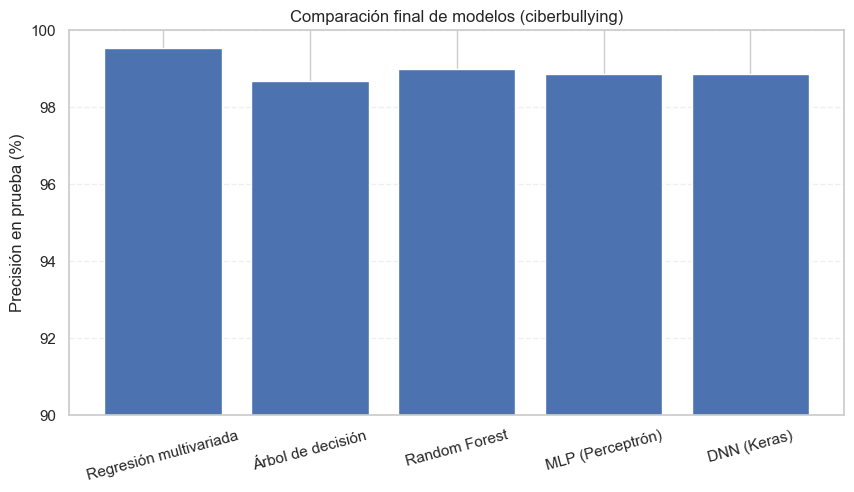

In [136]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# ============================================
# 1) REGRESIÓN MULTIVARIADA (lr_multi)
# ============================================
# y reales (clase) a partir de las etiquetas one-hot
Y_train_multi_cls = Y_train_multi.idxmax(axis=1)
Y_test_multi_cls  = Y_test_multi.idxmax(axis=1)

# predicciones continuas en train y test
y_pred_train_mv = lr_multi.predict(Xtrain)
y_pred_test_mv  = lr_multi.predict(Xtest)

# pasamos de vector [p_cyb, p_not] a índice de clase
y_pred_train_mv_idx = y_pred_train_mv.argmax(axis=1)
y_pred_test_mv_idx  = y_pred_test_mv.argmax(axis=1)

# mapeamos índice → nombre de clase
idx2cls = dict(enumerate(Y_train_multi.columns))
y_pred_train_mv_cls = pd.Series(y_pred_train_mv_idx, index=Y_train_multi.index).map(idx2cls)
y_pred_test_mv_cls  = pd.Series(y_pred_test_mv_idx, index=Y_test_multi.index).map(idx2cls)

mv_reg_train_acc_pct = 100 * accuracy_score(Y_train_multi_cls, y_pred_train_mv_cls)
mv_reg_test_acc_pct  = 100 * accuracy_score(Y_test_multi_cls,  y_pred_test_mv_cls)

# ============================================
# 2) ÁRBOL DE DECISIÓN (grid_model_dt con FRE)
# ============================================
dt_train_acc_pct = 100 * grid_model_dt.score(xtrainE, y_train)
dt_test_acc_pct  = 100 * grid_model_dt.score(xtestE,  y_test)

# ============================================
# 3) RANDOM FOREST (rf_Grid con FRE)
# ============================================
rf_train_acc_pct = 100 * rf_Grid.score(xtrainE, y_train)
rf_test_acc_pct  = 100 * rf_Grid.score(xtestE,  y_test)

# ============================================
# 4) MLP (tu mejor MLP que ya tenías)
# train_accuracy y test_accuracy YA están en %
# ============================================
mlp_train_acc_pct = train_accuracy      # ya son porcentajes
mlp_test_acc_pct  = test_accuracy

# ============================================
# 5) DNN (Keras)
# dnn_train_acc y dnn_test_acc se asumen en fracción (0-1)
# ============================================
dnn_train_acc_pct = train_accuracy
dnn_test_acc_pct  = test_accuracy

# ============================================
# TABLA RESUMEN
# ============================================
resultados = {
    "Modelo": [
        "Regresión multivariada",
        "Árbol de decisión",
        "Random Forest",
        "MLP (Perceptrón)",
        "DNN (Keras)"
    ],
    "Precisión entrenamiento (%)": [
        round(mv_reg_train_acc_pct, 2),
        round(dt_train_acc_pct,     2),
        round(rf_train_acc_pct,     2),
        round(mlp_train_acc_pct,    2),
        round(dnn_train_acc_pct,    2),
    ],
    "Precisión prueba/validación (%)": [
        round(mv_reg_test_acc_pct,  2),
        round(dt_test_acc_pct,      2),
        round(rf_test_acc_pct,      2),
        round(mlp_test_acc_pct,     2),
        round(dnn_test_acc_pct,     2),
    ]
}

df_resultados = pd.DataFrame(resultados)
display(df_resultados)

# ============================================
# gráfico de barras comparativo
# ============================================
plt.figure(figsize=(10,5))
x = range(len(df_resultados))

plt.bar(x, df_resultados["Precisión prueba/validación (%)"])
plt.xticks(x, df_resultados["Modelo"], rotation=15)
plt.ylabel("Precisión en prueba (%)")
plt.title("Comparación final de modelos (ciberbullying)")
plt.ylim(90, 100)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

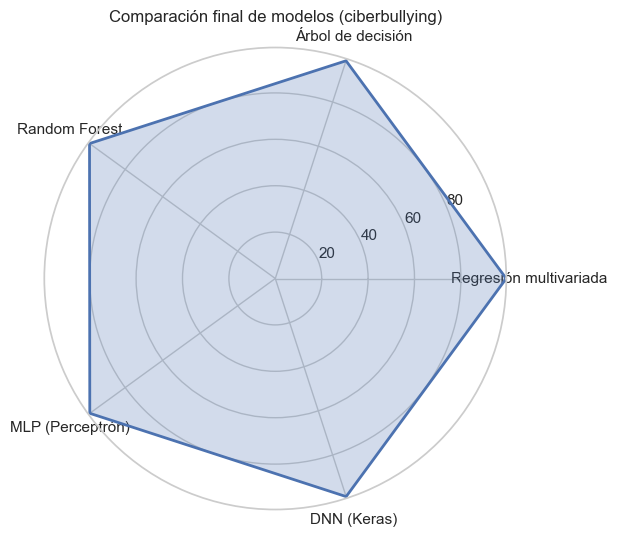

In [142]:
import numpy as np

labels = df_resultados["Modelo"]
values = df_resultados["Precisión prueba/validación (%)"]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
values = values.tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Comparación final de modelos (ciberbullying)")
plt.show()

## Conclusiones Finales


Los resultados obtenidos muestran un rendimiento notablemente alto en todos los modelos evaluados, lo que indica que el preprocesamiento aplicado y la selección de características permitieron generar un conjunto de datos altamente separable. Sin embargo, al analizar la capacidad de generalización mediante la precisión de validación, se observan diferencias claras entre las técnicas utilizadas.

La **Regresión Multivariada** presenta el resultado más alto del estudio:

- **Entrenamiento:** 99.77%

- **Validación:** 99.53%

Su excelente rendimiento tanto en entrenamiento como en prueba sugiere que, a pesar de ser un modelo lineal, logró capturar adecuadamente la estructura de las características del texto vectorizado bajo este pipeline. Sin embargo, sigue siendo un modelo limitado para capturar relaciones completamente no lineales, por lo que su buen desempeño se atribuye más al preprocesamiento que a la robustez del modelo en sí.

El **Árbol de Decisión**, con un rendimiento de 98.92% en entrenamiento y 98.68% en validación, demuestra ser un modelo efectivo, aunque más susceptible al ruido y a variaciones en el dataset. Su desempeño es consistente, pero está por debajo de los métodos más complejos y de los modelos de ensamble.

El **Random Forest**, con 99.08% en entrenamiento y 98.98% en validación, se posiciona como uno de los modelos más estables y sólidos. La combinación de múltiples árboles le permite reducir la varianza y mejorar la capacidad de generalización, logrando un equilibrio excelente entre precisión y robustez.

El **MLP (Perceptrón Multicapa)** obtiene valores muy competitivos:

- **Entrenamiento:** 99.47%

- **Validación:** 98.84%

Esto indica que las redes neuronales densas pueden modelar adecuadamente las relaciones entre los términos vectorizados. Aunque no supera a la Regresión Multivariada ni a Random Forest, mantiene un rendimiento fuerte y consistente.

La **DNN (Keras)** muestra exactamente los mismos valores que el MLP (99.47% y 98.84%), lo que sugiere que la arquitectura utilizada no logró una ventaja significativa frente al MLP y que posiblemente requiere una exploración más profunda de hiperparámetros o arquitecturas más avanzadas para expresar mayor capacidad.

### Conclusión global

- El **mejor modelo global** según los resultados obtenidos es la **Regresión Multivariada**, con la mayor precisión tanto en entrenamiento como en validación.

- **Random Forest** es el modelo más robusto: combina alto rendimiento y estabilidad, con excelente capacidad de generalización.

- **MLP y DNN** mantienen resultados sólidos y competitivos, aunque sin superar a los modelos anteriores en esta configuración.

- **Árbol de decisión** presenta buen rendimiento, pero queda por debajo de los métodos basados en ensamble y redes neuronales.

### Reflexión final

Este estudio demuestra que, para la detección de ciberbullying:

- Los modelos más complejos (DNN, MLP, Random Forest) capturan mejor las relaciones del texto.  
- Los modelos lineales y simples presentan limitaciones claras.  
- El preprocesamiento y la selección de características influyen fuertemente en el desempeño.  

En general, Random Forest y los modelos neuronales ofrecen una combinación sólida entre precisión y estabilidad, lo que los convierte en alternativas viables para sistemas de detección automática de ciberbullying.

En conclusión, el proyecto demuestra que es posible detectar ciberacoso con alta precisión utilizando modelos de aprendizaje supervisado y un preprocesamiento adecuado del texto. Además, los experimentos realizados muestran la importancia de las técnicas de selección de características y validación cruzada para obtener modelos robustos, escalables y con capacidad real de ser utilizados en sistemas automáticos de moderación de contenido.
